<a href="https://colab.research.google.com/github/anshu57/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.ticker as mtick
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

#Data Initialization

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised ML Regression(Bike sharing Demand Prediction)/SeoulBikeData.csv',encoding= 'unicode_escape')

In [7]:
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [8]:
dataset.shape

(8760, 14)

In [9]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Data do not have any null value

In [10]:
#Rename columns
dataset = dataset.rename(columns={'Rented Bike Count': 'Rented_Bike_Count', 
                        'Temperature(°C)': 'Temperature',
                        'Humidity(%)': 'Humidity', 
                        'Wind speed (m/s)': 'Wind_speed', 
                        'Visibility (10m)': 'Visibility', 
                        'Dew point temperature(°C)': 'Dew_point_temperature', 
                        'Solar Radiation (MJ/m2)': 'Solar_Radiation', 
                        'Rainfall(mm)': 'Rainfall', 
                        'Snowfall (cm)': 'Snowfall',
                        'Functioning Day': 'Functioning_Day'})

In [11]:
dataset.describe(include='all')

Date  Rented_Bike_Count         Hour  Temperature     Humidity  \
count         8760        8760.000000  8760.000000  8760.000000  8760.000000   
unique         365                NaN          NaN          NaN          NaN   
top     01/12/2017                NaN          NaN          NaN          NaN   
freq            24                NaN          NaN          NaN          NaN   
mean           NaN         704.602055    11.500000    12.882922    58.226256   
std            NaN         644.997468     6.922582    11.944825    20.362413   
min            NaN           0.000000     0.000000   -17.800000     0.000000   
25%            NaN         191.000000     5.750000     3.500000    42.000000   
50%            NaN         504.500000    11.500000    13.700000    57.000000   
75%            NaN        1065.250000    17.250000    22.500000    74.000000   
max            NaN        3556.000000    23.000000    39.400000    98.000000   

         Wind_speed   Visibility  Dew_point_temperature  Solar_Radiation  \
count   8760.000000  8760.000000            8760.000000      8760.000000   
unique          NaN          NaN                    NaN              NaN   
top             NaN          NaN                    NaN              NaN   
freq            NaN          NaN                    NaN              NaN   
mean       1.724909  1436.825799               4.073813         0.569111   
std        1.036300   608.298712              13.060369         0.868746   
min        0.000000    27.000000             -30.600000         0.000000   
25%        0.900000   940.000000              -4.700000         0.000000   
50%        1.500000  1698.000000               5.100000         0.010000   
75%        2.300000  2000.000000              14.800000         0.930000   
max        7.400000  2000.000000              27.200000         3.520000   

           Rainfall     Snowfall Seasons     Holiday Functioning_Day  
count   8760.000000  8760.000000    8760        8760            8760  
unique          NaN          NaN       4           2               2  
top             NaN          NaN  Spring  No Holiday             Yes  
freq            NaN          NaN    2208        8328            8465  
mean       0.148687     0.075068     NaN         NaN             NaN  
std        1.128193     0.436746     NaN         NaN             NaN  
min        0.000000     0.000000     NaN         NaN             NaN  
25%        0.000000     0.000000     NaN         NaN             NaN  
50%        0.000000     0.000000     NaN         NaN             NaN  
75%        0.000000     0.000000     NaN         NaN             NaN  
max       35.000000     8.800000     NaN         NaN             NaN

In [12]:
# duplicate
len(dataset[dataset.duplicated()])

0

Data Set do not contain any duplicate values.

#Exploratory Data Analysis

In [13]:
dataset['Rented_Bike_Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented_Bike_Count, Length: 8760, dtype: int64

In [14]:
#Converting the Date column in Datetime Dtype
dataset['Date']=pd.to_datetime(dataset['Date'])

#Breaking Down the Date into 3 Components
dataset['Day']=dataset['Date'].dt.day
dataset['Month']=dataset['Date'].dt.month
dataset['Year']=dataset['Date'].dt.year

In [15]:
dataset

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0    2017-01-12                254     0         -5.2        37         2.2   
1    2017-01-12                204     1         -5.5        38         0.8   
2    2017-01-12                173     2         -6.0        39         1.0   
3    2017-01-12                107     3         -6.2        40         0.9   
4    2017-01-12                 78     4         -6.0        36         2.3   
...         ...                ...   ...          ...       ...         ...   
8755 2018-11-30               1003    19          4.2        34         2.6   
8756 2018-11-30                764    20          3.4        37         2.3   
8757 2018-11-30                694    21          2.6        39         0.3   
8758 2018-11-30                712    22          2.1        41         1.0   
8759 2018-11-30                584    23          1.9        43         1.3   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0           2000                  -17.6              0.0       0.0       0.0   
1           2000                  -17.6              0.0       0.0       0.0   
2           2000                  -17.7              0.0       0.0       0.0   
3           2000                  -17.6              0.0       0.0       0.0   
4           2000                  -18.6              0.0       0.0       0.0   
...          ...                    ...              ...       ...       ...   
8755        1894                  -10.3              0.0       0.0       0.0   
8756        2000                   -9.9              0.0       0.0       0.0   
8757        1968                   -9.9              0.0       0.0       0.0   
8758        1859                   -9.8              0.0       0.0       0.0   
8759        1909                   -9.3              0.0       0.0       0.0   

     Seasons     Holiday Functioning_Day  Day  Month  Year  
0     Winter  No Holiday             Yes   12      1  2017  
1     Winter  No Holiday             Yes   12      1  2017  
2     Winter  No Holiday             Yes   12      1  2017  
3     Winter  No Holiday             Yes   12      1  2017  
4     Winter  No Holiday             Yes   12      1  2017  
...      ...         ...             ...  ...    ...   ...  
8755  Autumn  No Holiday             Yes   30     11  2018  
8756  Autumn  No Holiday             Yes   30     11  2018  
8757  Autumn  No Holiday             Yes   30     11  2018  
8758  Autumn  No Holiday             Yes   30     11  2018  
8759  Autumn  No Holiday             Yes   30     11  2018  

[8760 rows x 17 columns]

In [16]:
dataset.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Day',
       'Month', 'Year'],
      dtype='object')

##Univariate Analysis

In [17]:
categorical_features = dataset.describe(include = ['object','category']).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

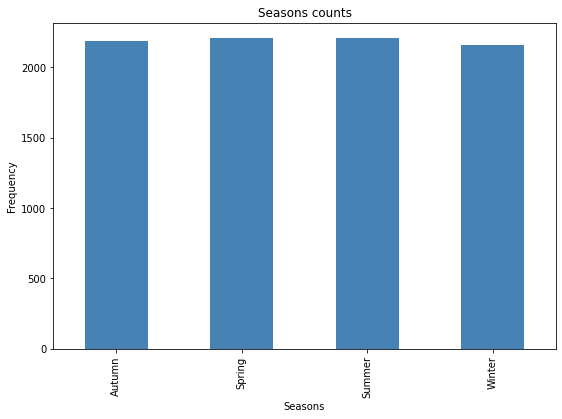

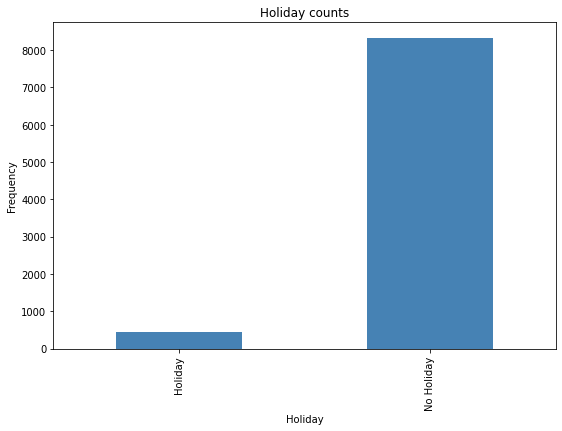

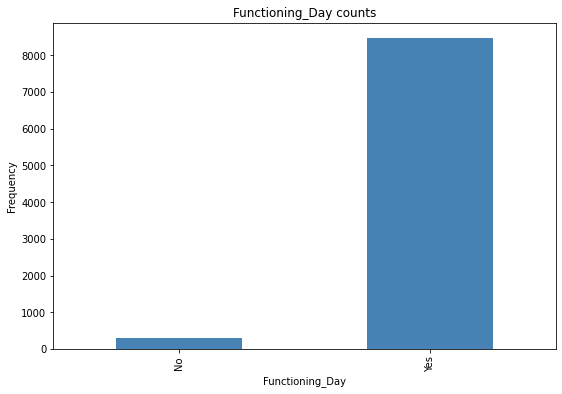

In [18]:
#Bar Plot for Categorical variables
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [19]:
dataset['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [20]:
dataset['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [21]:
dataset['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

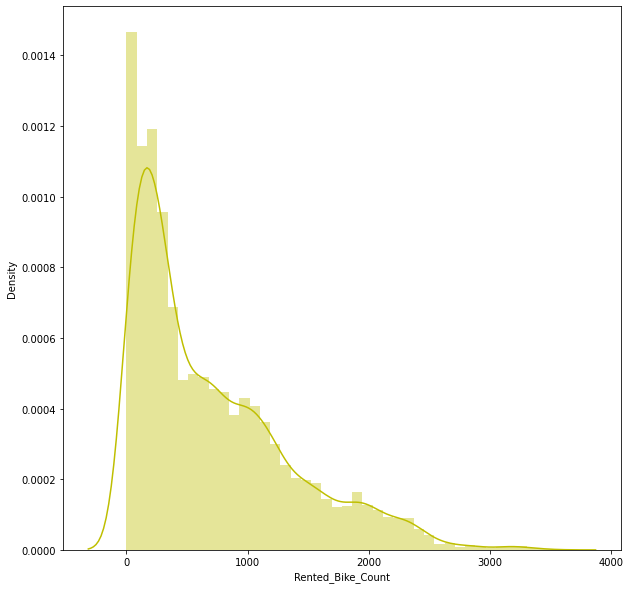

In [22]:
# Dependent variable 'Rented_Bike_Count'
plt.figure(figsize=(10,10))
sns.distplot(dataset['Rented_Bike_Count'],color="y")

In [23]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Day', 'Month', 'Year'],
      dtype='object')

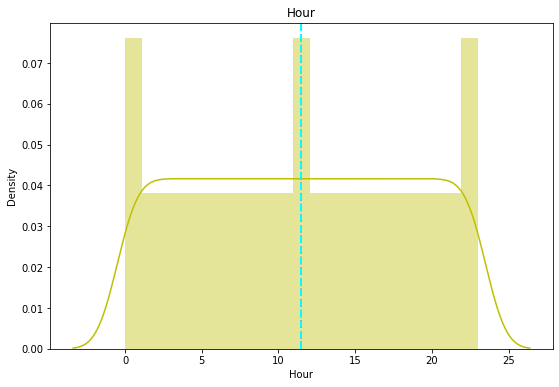

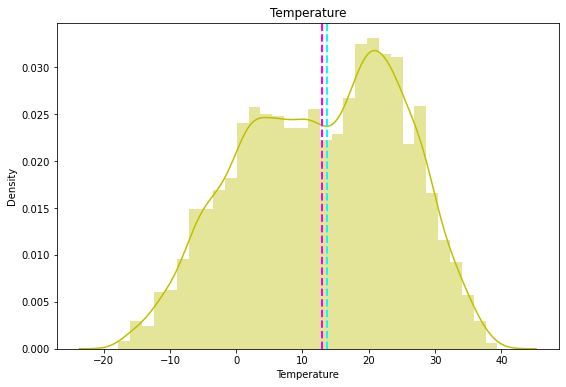

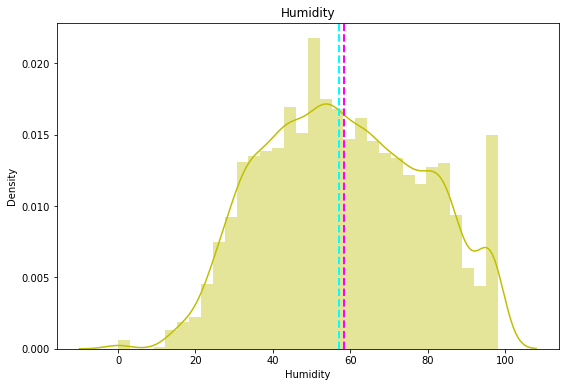

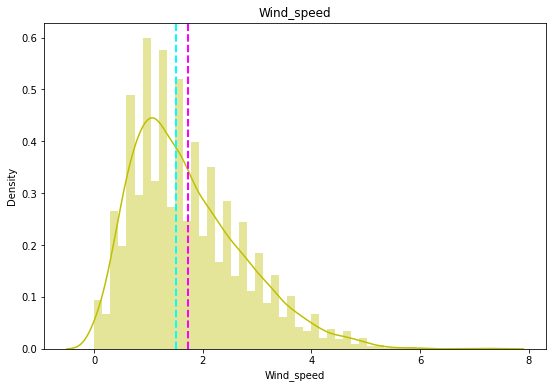

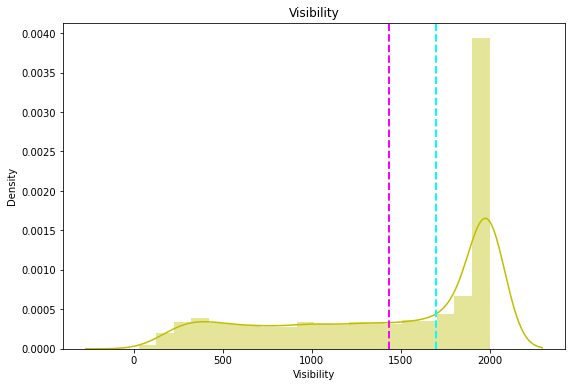

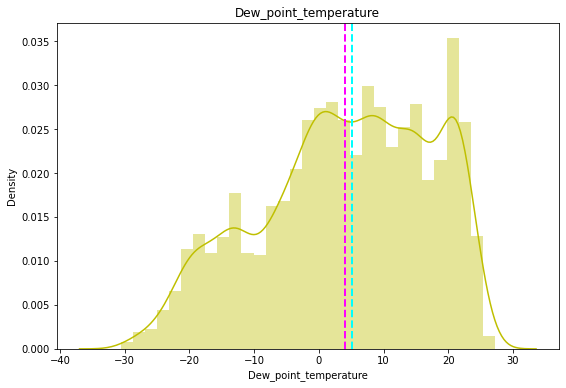

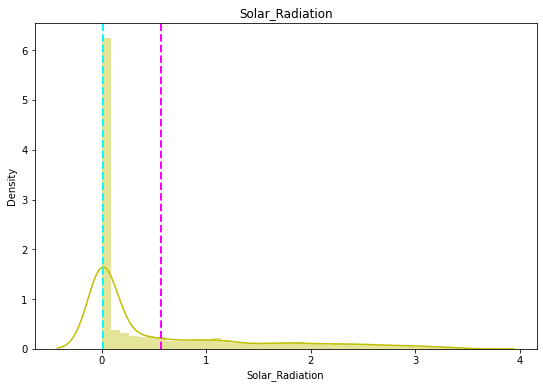

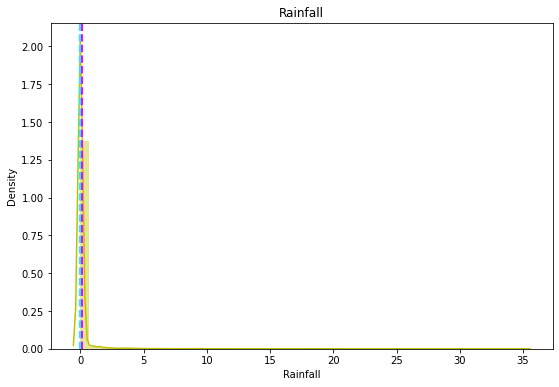

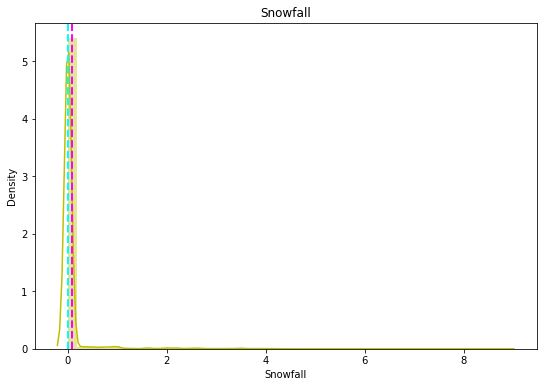

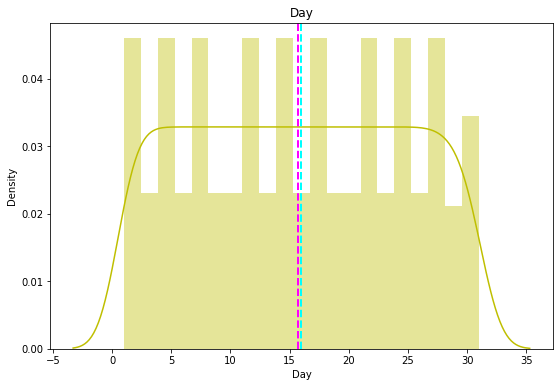

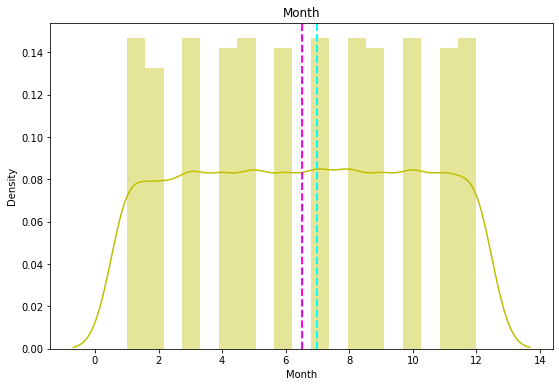

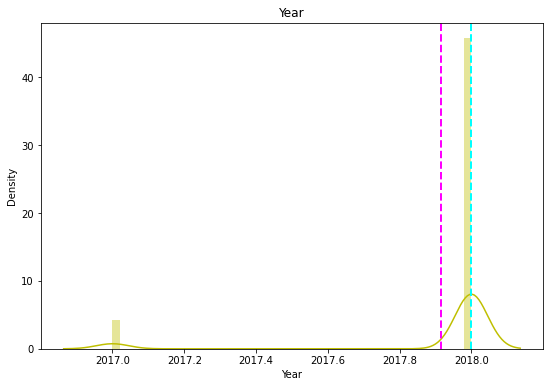

In [24]:
# plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    sns.distplot(feature,color="y")
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)      
    ax.set_title(col)
plt.show()

In [25]:
dataset['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [26]:
dataset.groupby(['Year','Month']).agg({'Rented_Bike_Count':['sum']}).reset_index()

Year Month Rented_Bike_Count
                             sum
0   2017     1              9539
1   2017     2              8523
2   2017     3              7222
3   2017     4              8729
4   2017     5              8307
5   2017     6              6669
6   2017     7              8549
7   2017     8              8032
8   2017     9              7233
9   2017    10              3453
10  2017    11              5848
11  2017    12            103226
12  2018     1            277705
13  2018     2            255589
14  2018     3            447815
15  2018     4            547490
16  2018     5            657641
17  2018     6            700059
18  2018     7            682790
19  2018     8            606158
20  2018     9            492093
21  2018    10            623535
22  2018    11            487564
23  2018    12            208545

In [27]:
dataset['Month_name']=dataset['Month'].map({1:'Janyuary',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})


In [28]:
#bar plot for the month_year group
month_year_group= dataset.groupby(by=['Month','Month_name','Year']).agg({'Rented_Bike_Count':'sum'}).reset_index()
px.bar(month_year_group,y= 'Rented_Bike_Count',x= 'Month_name',color= 'Year',facet_row= 'Year',title='Total Rented Bikes in 2017 and 2018 on monthly basis',width=1000, height=500)

#Bivariate Analysis

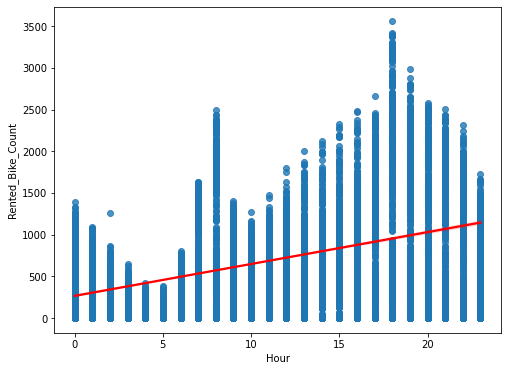

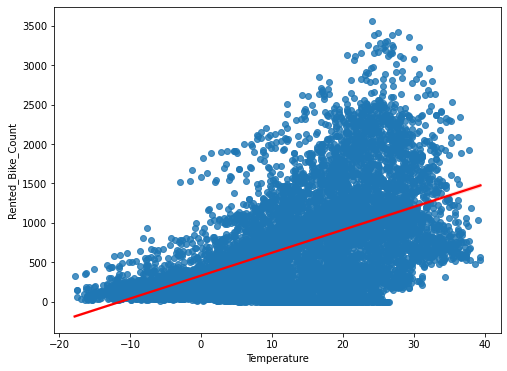

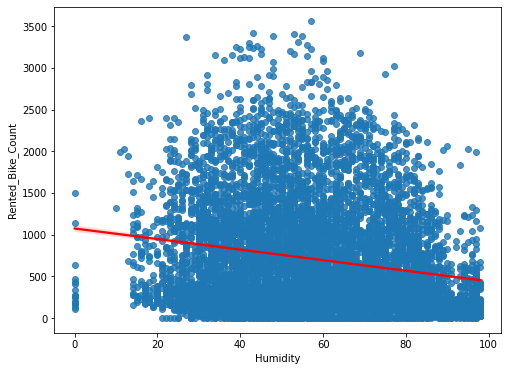

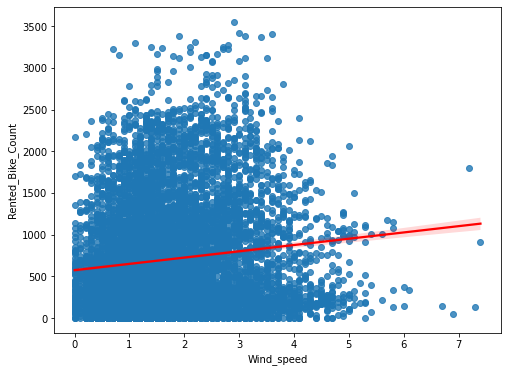

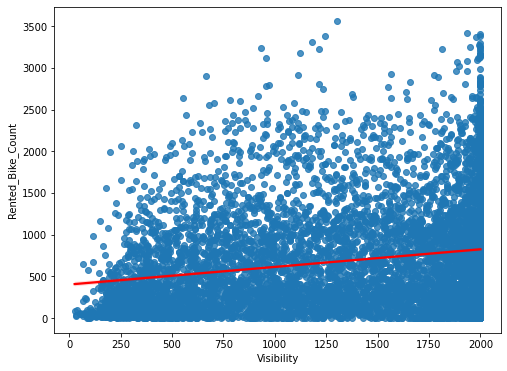

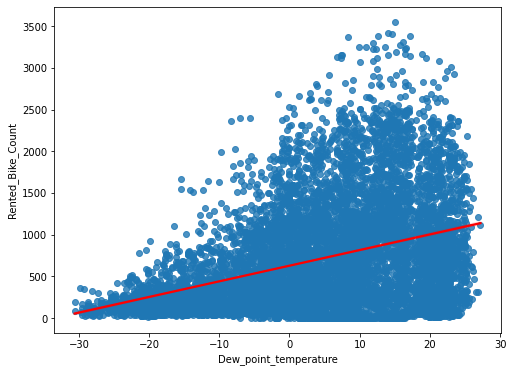

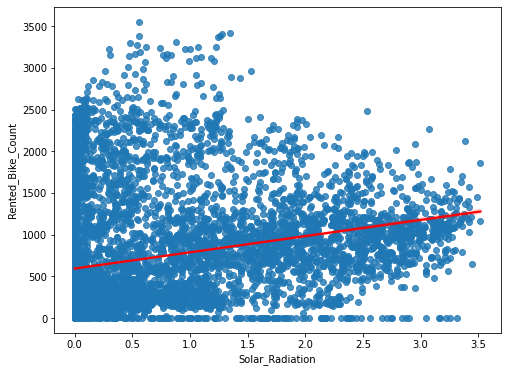

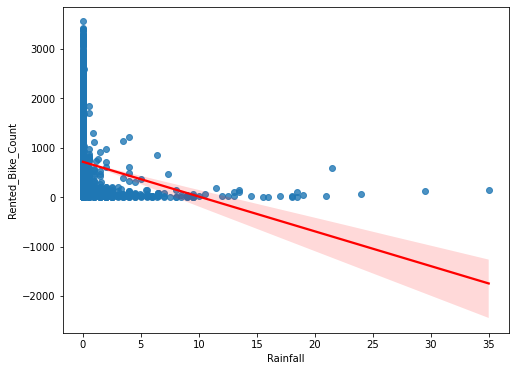

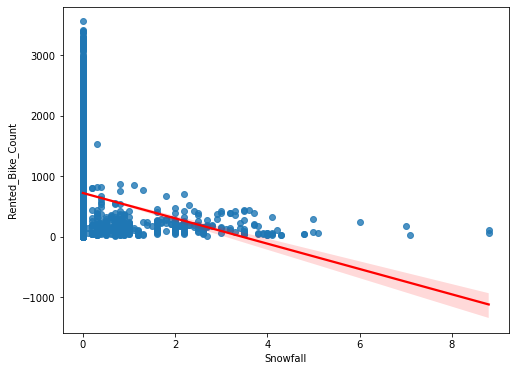

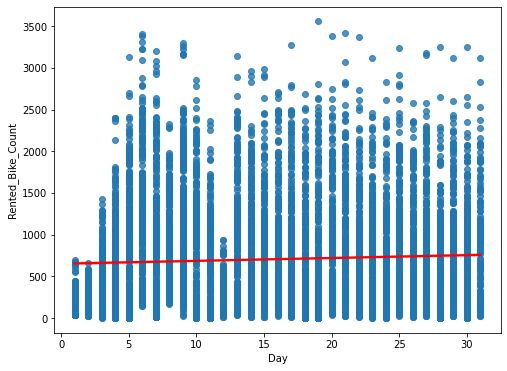

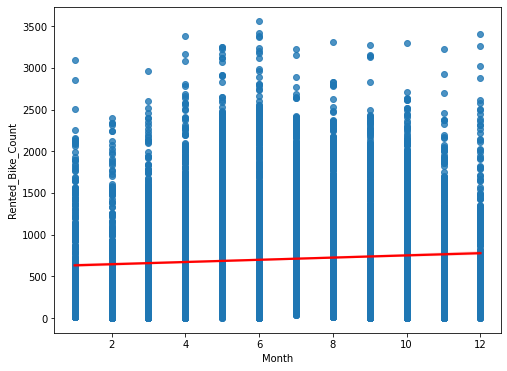

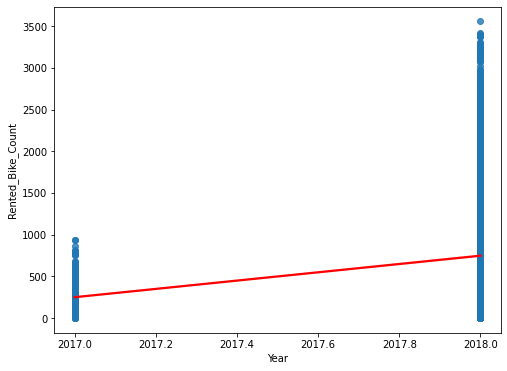

In [29]:
#plot for numerical feature
plt.rcParams['figure.figsize'] = (8, 6)
for col in numeric_features[1:]:
  plt.figure()
  sns.regplot(x=dataset[col], y = dataset['Rented_Bike_Count'], line_kws={"color": "Red"})

##Effects of Numerical features on rented bike count:-

* **Hour:** Demand for bikes is mostly in the evening between 3 to 8 pm, also the least demand is at morning 5pm. 
* **Temperature:** People prefer to rent bikes at normal temperature of 20°C. to 30°C. Hence it is positively related to Rented Bike.
* **Humidity:** It is negatively correlated , as people prefer to rent a bike less if there is more moisture in the air.
* **Wind_speed:** Wind Speed doesn't affect much for renting a bike but is slightly positively correlated.
* **Visibility:** It does not affect, similar to wind speed, it is positively correlated.
* **Dew point temperature:** The dew point is the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity. It is positively correlated with data.
* **SnowFall and Rainfall**: People don't prefer to rent a bike, when there is rainfall or snowfall.



###Outlier detection

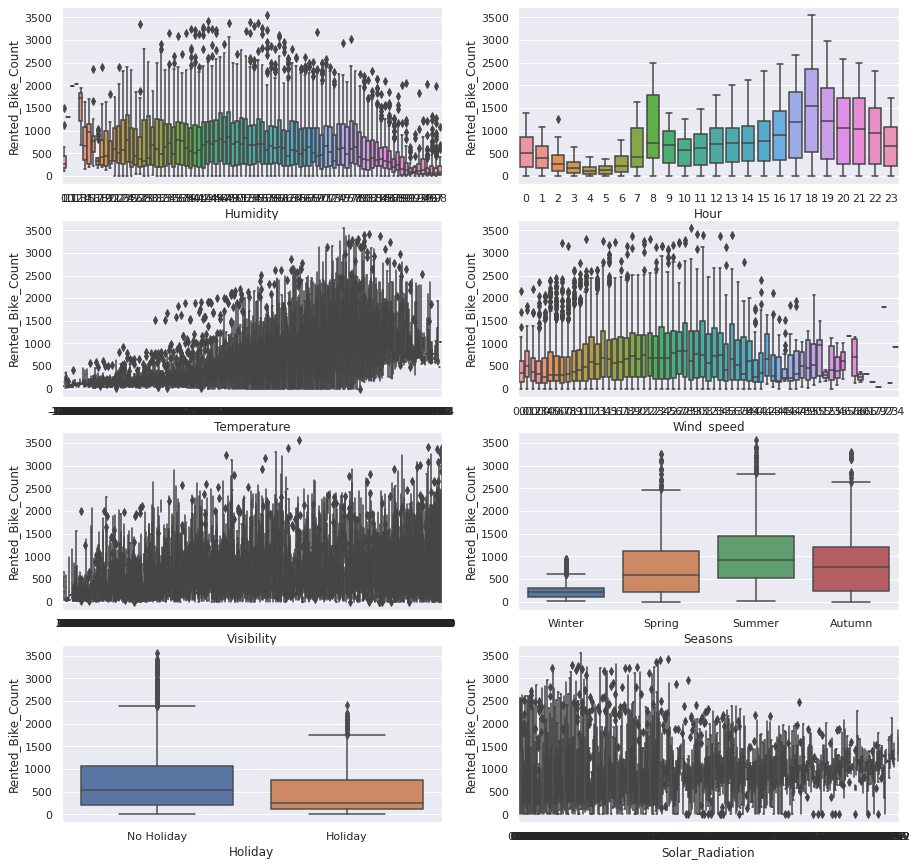

In [30]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)

sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Humidity",orient="v",ax=axes[0][0])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Hour",orient="v",ax=axes[0][1])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Temperature",orient="v",ax=axes[1][0])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Wind_speed",orient="v",ax=axes[1][1])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Visibility",orient="v",ax=axes[2][0])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=dataset,y="Rented_Bike_Count",x="Solar_Radiation",orient="v",ax=axes[3][1])


In [31]:
#Correlation
np.round(dataset.corr()['Rented_Bike_Count'],3)

Rented_Bike_Count        1.000
Hour                     0.410
Temperature              0.539
Humidity                -0.200
Wind_speed               0.121
Visibility               0.199
Dew_point_temperature    0.380
Solar_Radiation          0.262
Rainfall                -0.123
Snowfall                -0.142
Day                      0.047
Month                    0.071
Year                     0.215
Name: Rented_Bike_Count, dtype: float64

Maximum correlation is shown by hour and temperature with Rented Bike Count.

In [32]:
# dropping the non-perfoming column
dataset.drop('Month_name',axis=1,inplace=True)
dataset.drop('Date',axis=1,inplace=True)

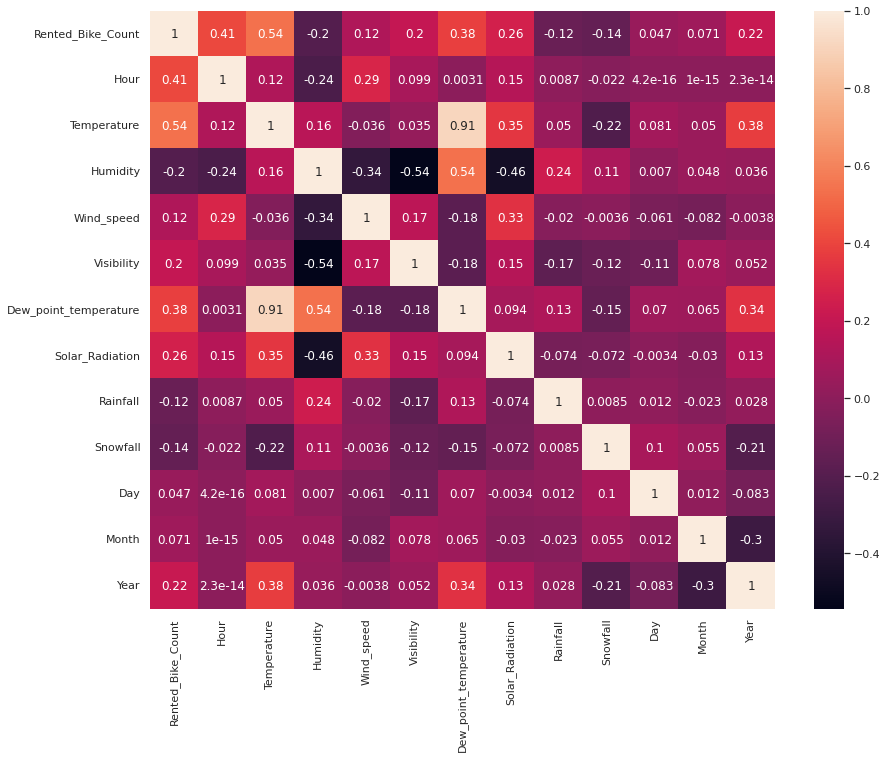

In [33]:
#get correlations of each features in dataset
#plot heat map
plt.figure(figsize=(14,11))
g=sns.heatmap(dataset.corr(),annot=True)

Temperature and Dew Point temperature ar highly correlated.We can add them to make one single column

In [34]:
dataset['Temperature_and_dp_temperature']=dataset['Temperature']+dataset['Dew_point_temperature']
dataset.drop(['Temperature','Dew_point_temperature'],axis=1,inplace=True)

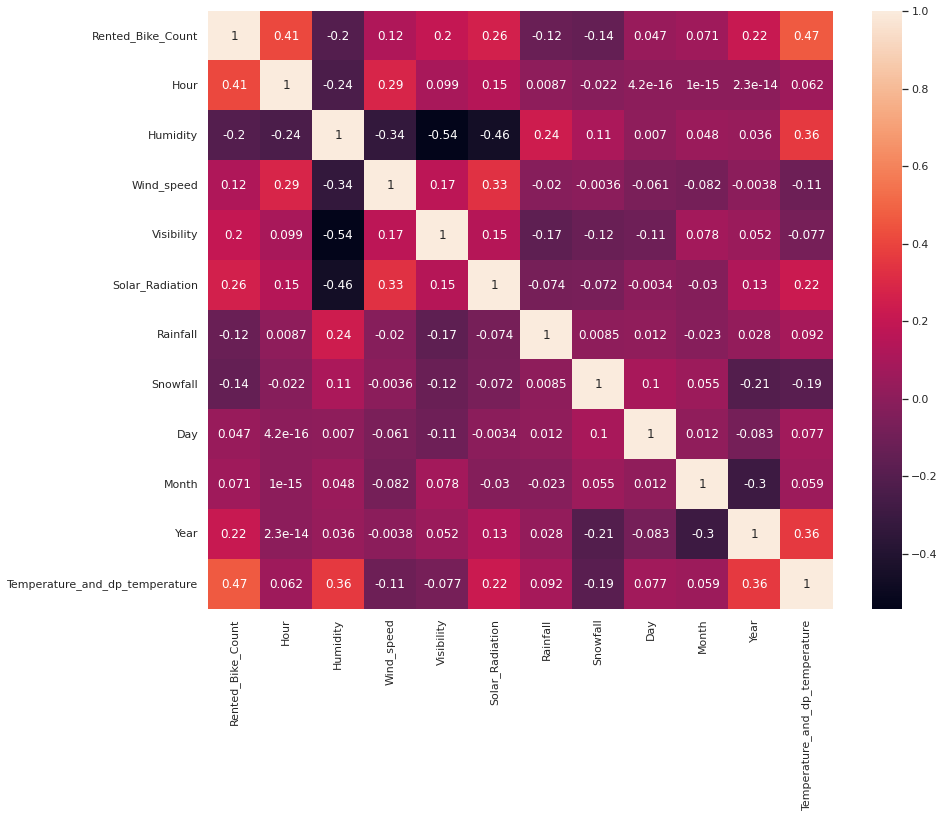

In [35]:
plt.figure(figsize=(14,11))
g=sns.heatmap(dataset.corr(),annot=True)

#Data Preparation

In [36]:
dataset_copy = dataset.copy()
dataset_copy.head()

Rented_Bike_Count  Hour  Humidity  Wind_speed  Visibility  Solar_Radiation  \
0                254     0        37         2.2        2000              0.0   
1                204     1        38         0.8        2000              0.0   
2                173     2        39         1.0        2000              0.0   
3                107     3        40         0.9        2000              0.0   
4                 78     4        36         2.3        2000              0.0   

   Rainfall  Snowfall Seasons     Holiday Functioning_Day  Day  Month  Year  \
0       0.0       0.0  Winter  No Holiday             Yes   12      1  2017   
1       0.0       0.0  Winter  No Holiday             Yes   12      1  2017   
2       0.0       0.0  Winter  No Holiday             Yes   12      1  2017   
3       0.0       0.0  Winter  No Holiday             Yes   12      1  2017   
4       0.0       0.0  Winter  No Holiday             Yes   12      1  2017   

   Temperature_and_dp_temperature  
0                           -22.8  
1                           -23.1  
2                           -23.7  
3                           -23.8  
4                           -24.6

In [37]:
# One hot encoding
#creating dummies column for the given feature
dataset_copy=pd.get_dummies(dataset,drop_first=True)

In [38]:
dataset_copy.head()

Rented_Bike_Count  Hour  Humidity  Wind_speed  Visibility  Solar_Radiation  \
0                254     0        37         2.2        2000              0.0   
1                204     1        38         0.8        2000              0.0   
2                173     2        39         1.0        2000              0.0   
3                107     3        40         0.9        2000              0.0   
4                 78     4        36         2.3        2000              0.0   

   Rainfall  Snowfall  Day  Month  Year  Temperature_and_dp_temperature  \
0       0.0       0.0   12      1  2017                           -22.8   
1       0.0       0.0   12      1  2017                           -23.1   
2       0.0       0.0   12      1  2017                           -23.7   
3       0.0       0.0   12      1  2017                           -23.8   
4       0.0       0.0   12      1  2017                           -24.6   

   Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning_Day_Yes  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [39]:
# shape of the data
dataset_copy.shape

(8760, 17)

#Implementing Linear Regression

For Linear Regression to be impemented we have to take certain assumptions.
1. **Linear relationship** - There should be linear relationship between feature variable and dependent variable.
2. **Little or no-multicollinearity** - There should not be multicollinearity among variables.
3. **Little or no auto-correlation** - Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.
4. **Homoscedasticity** -  Variance should be same, i.e error term should be same across all values of the independent variable.

In [40]:
#Data for independent variables
X = dataset_copy.drop(labels ='Rented_Bike_Count',axis = 1)

#Data fdor Dependent variable 
y = np.sqrt(dataset_copy['Rented_Bike_Count'])

Let's now begin to train our model, first we need to split our data in train and test.


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 24)

In [42]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 16) (7008,)
(1752, 16) (1752,)


In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

In [44]:
reg.coef_

array([ 4.98676663e-01, -2.24627136e-01,  1.69622617e-01, -5.06672126e-06,
       -7.54739501e-01, -1.45274068e+00,  1.81279768e-01, -1.29658470e-02,
       -1.77457180e-02, -2.48756193e+00,  2.47899202e-01, -2.99785198e+00,
       -2.96622550e+00, -9.03947992e+00,  2.89776526e+00,  2.85813416e+01])

In [45]:
len(reg.coef_)

16

In [46]:
reg.intercept_

5020.346342813962

In [47]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)


In [48]:
y_pred_train

array([25.0690779 , 33.1389199 , 19.75395022, ..., 30.2286155 ,
       27.84051159, 16.88750947])

In [49]:
y_pred_test

array([30.68575887, 10.34435027,  4.09807798, ..., 11.53039858,
       16.51367323,  4.86190384])

# Regression Evaluation metrics
---

1. **Mean Squared Error (MSE)** is the mean of the squared errors.
2. **Root Mean Squared Error (RMSE)**  is the square root of the mean of the squared errors.
3. **R-Squared** 
4. **Adujusted R-Squared**

In [50]:
#metrics for linear regression analysis for train dataset
MSE = mean_squared_error((y_train),(y_pred_train))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

MSE : 54.020892750884485
RMSE : 7.349890662512231
R2: 0.6518220366862129
Adjusted R2 : 0.6510251768073656


In [51]:
#metrics for linear regression analysis for test dataset
MSE = mean_squared_error((y_test),(y_pred_test))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_test)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.71126097463167
RMSE : 7.121183958769192
R2: 0.6710932500851713
Adjusted R2 : 0.668060104264631


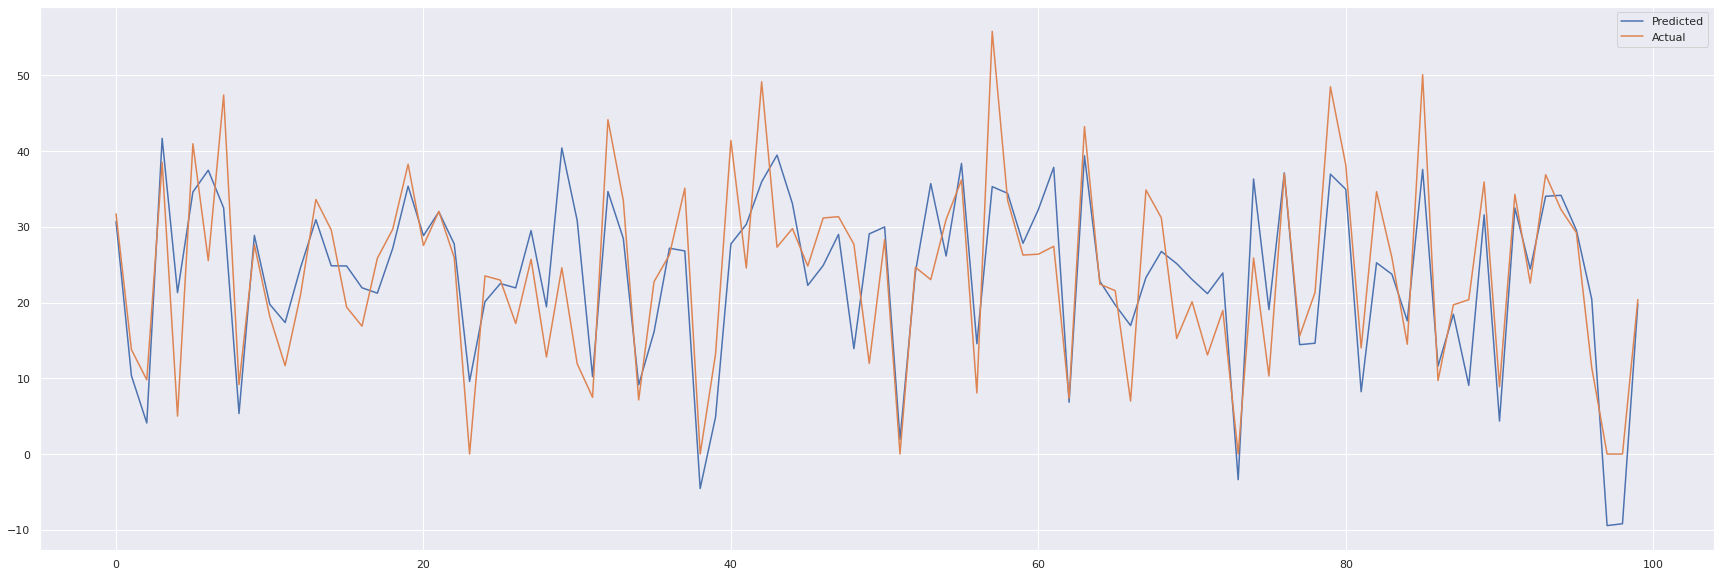

In [52]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

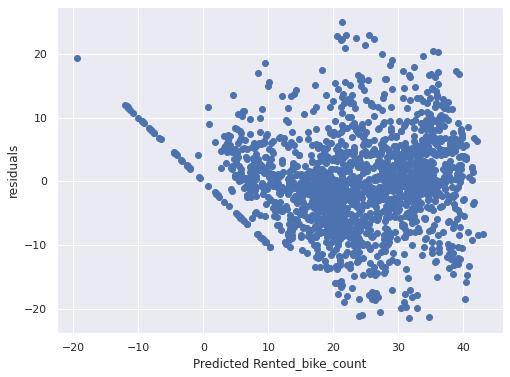

In [53]:
# Heteroscedasticity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

#Implementing Lasso Regression

In [54]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [55]:
lasso.score(X_train,y_train)

0.6518220210763701

In [56]:
lasso.coef_

array([ 4.98689559e-01, -2.24606552e-01,  1.69299223e-01, -4.62966490e-06,
       -7.54342947e-01, -1.45266703e+00,  1.80611292e-01, -1.29265617e-02,
       -1.74765188e-02, -2.48304519e+00,  2.47901772e-01, -2.99454695e+00,
       -2.96377036e+00, -9.03434670e+00,  2.89536380e+00,  2.85767101e+01])

In [57]:
lasso.intercept_

5011.231964660293

In [58]:
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

In [59]:
#Evaluation metrics for lasso regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_l))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_l)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_l))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.02089517280007
RMSE : 7.349890827270842
R2: 0.6518220210763701
Adjusted R2 : 0.648611157870158


In [60]:
#Evaluation metrics for lasso regression on test data
MSE = mean_squared_error((y_test),(y_pred_test_l))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_test_l)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_l))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.71166994907342
RMSE : 7.12121267405162
R2: 0.6710905975292725
Adjusted R2 : 0.6680574272471217


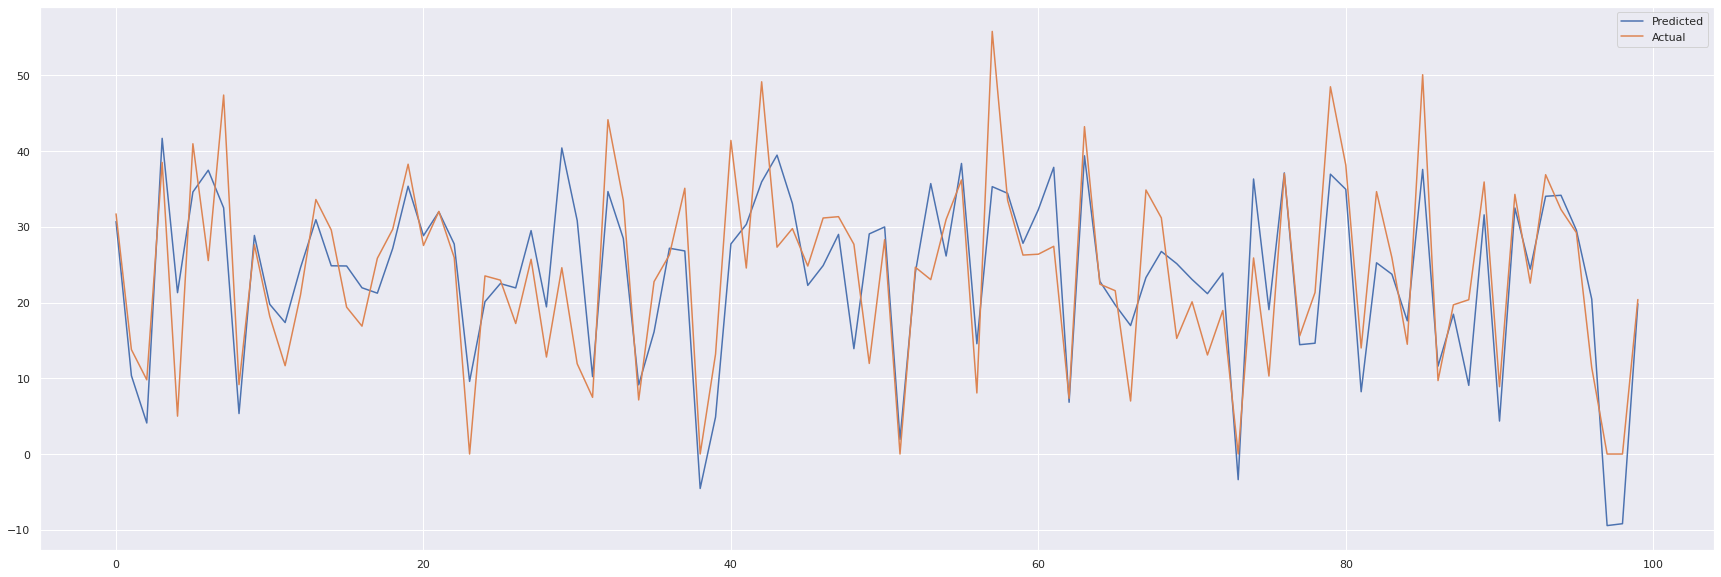

In [61]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_l[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

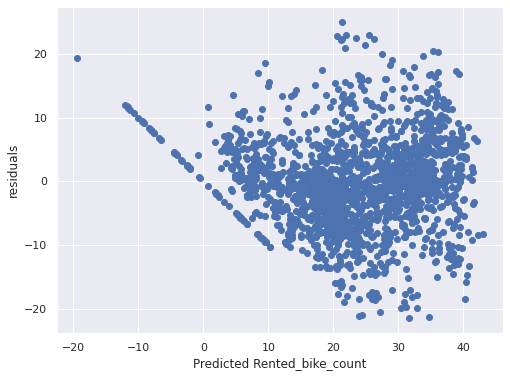

In [62]:
# Heteroscedasticity
plt.scatter((y_pred_test_l),(y_test)-(y_pred_test_l))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

# Running Grid Search Cross-Validation for Lasso



In [63]:
##cross Validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [64]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -54.41566295189232


In [65]:
y_pred_train_lasso = lasso_regressor.predict(X_train)
y_pred_lasso = lasso_regressor.predict(X_test)

In [66]:
#Evaluation metrics for lasso regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_lasso))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_lasso)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.02113494245981
RMSE : 7.349907138356226
R2: 0.6518204757018393
Adjusted R2 : 0.6486095982443347


In [67]:
#Evaluation metrics for lasso regression on test data
MSE = mean_squared_error((y_test),(y_pred_lasso))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.71557738931464
RMSE : 7.121487020932822
R2: 0.6710652543718449
Adjusted R2 : 0.6680318503775795


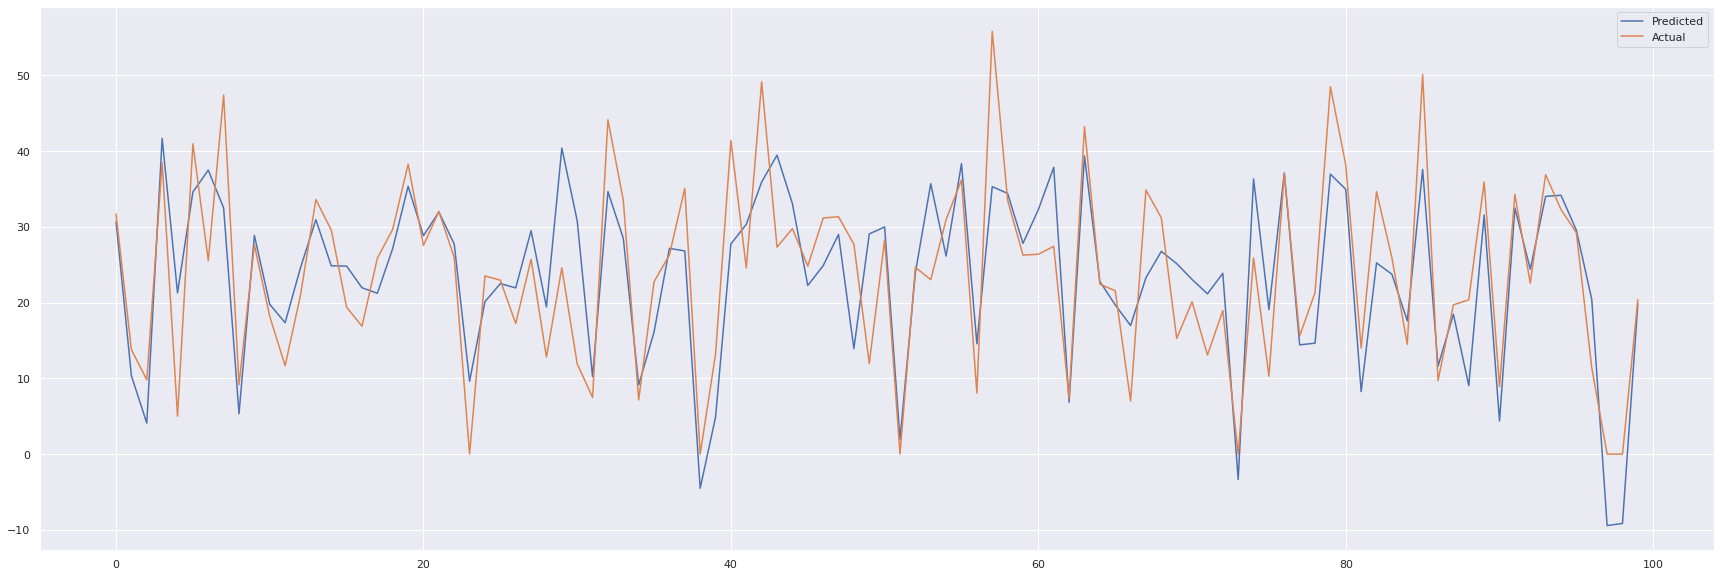

In [68]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_lasso[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

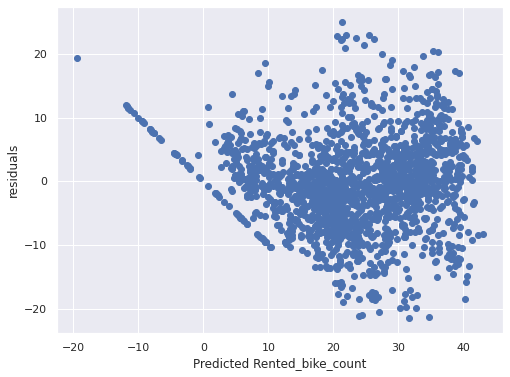

In [69]:
# Heteroscedasticity
plt.scatter((y_pred_lasso),(y_test)-(y_pred_lasso))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

#Implementing Ridge Regression

In [70]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [71]:
ridge.score(X_train,y_train)

0.6518219908440034

In [72]:
y_pred_train_r =ridge.predict(X_train)
y_pred_r =ridge.predict(X_test)

In [73]:
#Evaluation metrics for ridge regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_r))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_lasso)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.0208998634457
RMSE : 7.349891146367114
R2: 0.6518204757018393
Adjusted R2 : 0.6486095982443347


In [74]:
#Evaluation metrics for ridge regression on test data
MSE = mean_squared_error((y_test),(y_pred_r))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_r)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.71117007673056
RMSE : 7.121177576548036
R2: 0.671093839637327
Adjusted R2 : 0.6680606992535791


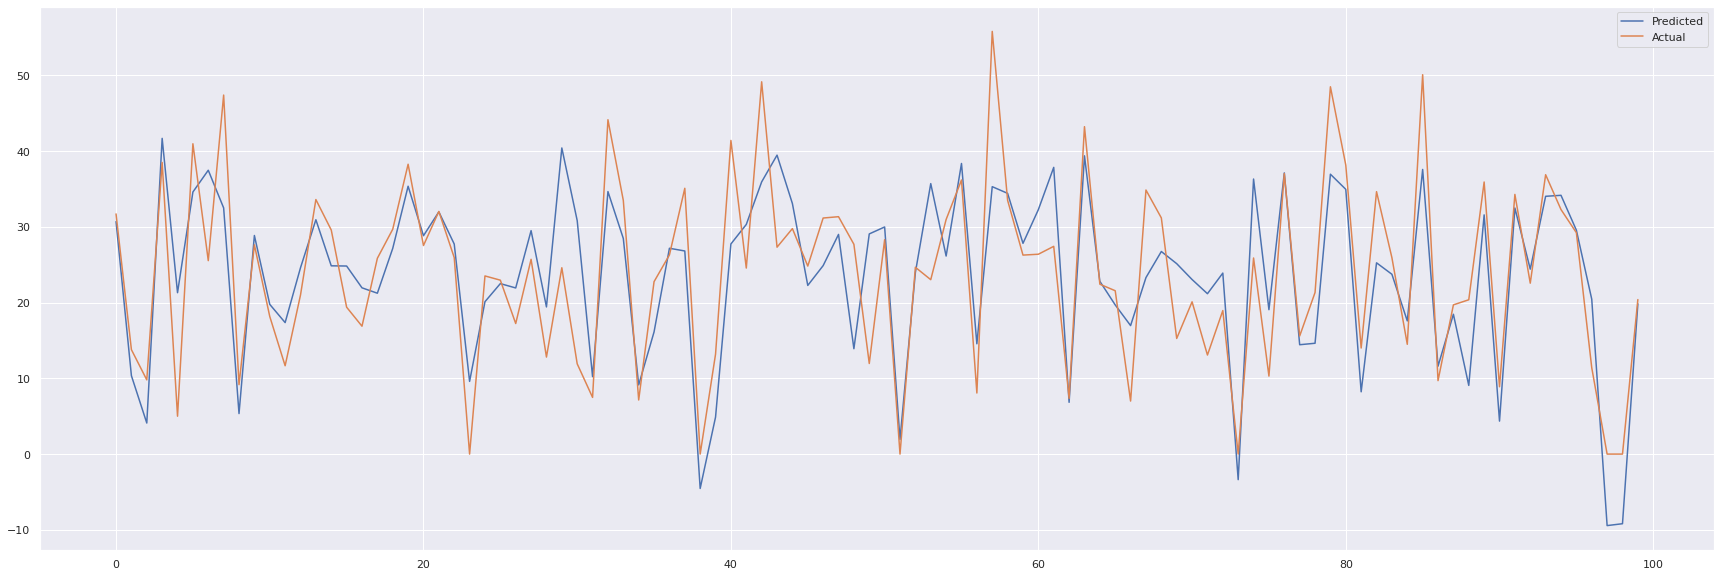

In [75]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_r[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

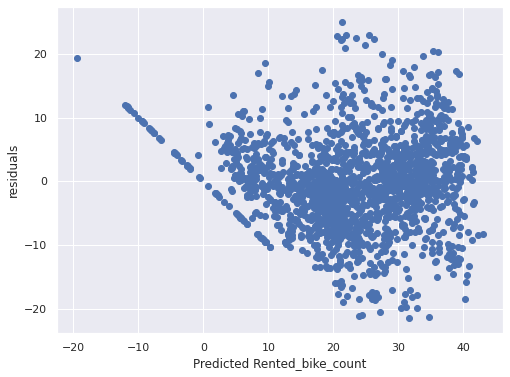

In [76]:
# Heteroscedasticity
plt.scatter((y_pred_r),(y_test)-(y_pred_r))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

#Running Grid Search Cross Validation for Ridge Regression

In [77]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [78]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -54.39823918538963


In [79]:
#Model Prediction
y_pred_train_ridge = ridge_regressor.predict(X_train)
y_pred_ridge = ridge_regressor.predict(X_test)

In [80]:
#Evaluation metrics for ridge regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_ridge))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_ridge)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.02089282208099
RMSE : 7.349890667355603
R2: 0.6518220362273338
Adjusted R2 : 0.6486111731608424


In [81]:
#Evaluation metrics for ridge regression on test data
MSE = mean_squared_error((y_test),(y_pred_ridge))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.711251168967785
RMSE : 7.1211832702836535
R2: 0.6710933136834525
Adjusted R2 : 0.6680601684494094


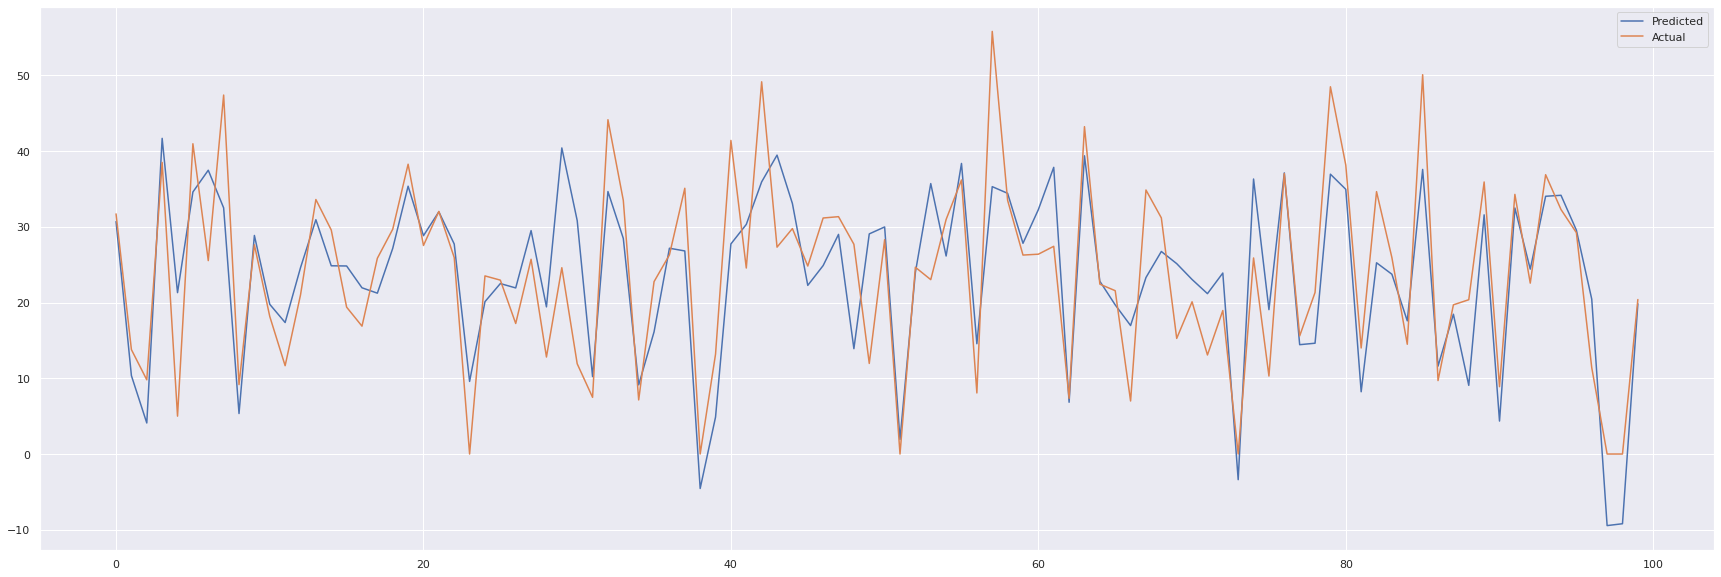

In [82]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_ridge[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

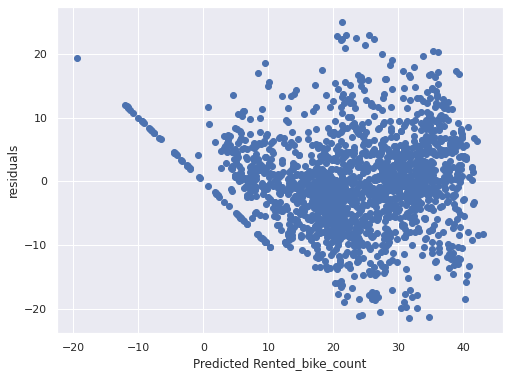

In [83]:
#Heteroscedasticity
plt.scatter((y_pred_ridge),(y_test - y_pred_ridge))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

#Implementing Elastic Net Regressor

In [84]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [85]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [86]:
elasticnet.score(X_train,y_train)

0.5781998131892938

In [87]:
y_pred_train_en = elasticnet.predict(X_train)
y_pred_en = elasticnet.predict(X_test)

In [88]:
#Evaluation metrics for ElasticNet regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_en))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_en)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 65.44360946091476
RMSE : 8.089722458831005
R2: 0.5781998131892938
Adjusted R2 : 0.5743100131956504


In [89]:
#Evaluation metrics for ridge regression on test data
MSE = mean_squared_error((y_test),(y_pred_en))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_en)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 63.47844104730098
RMSE : 7.967335881416132
R2: 0.5882869537601856
Adjusted R2 : 0.5844901763885216


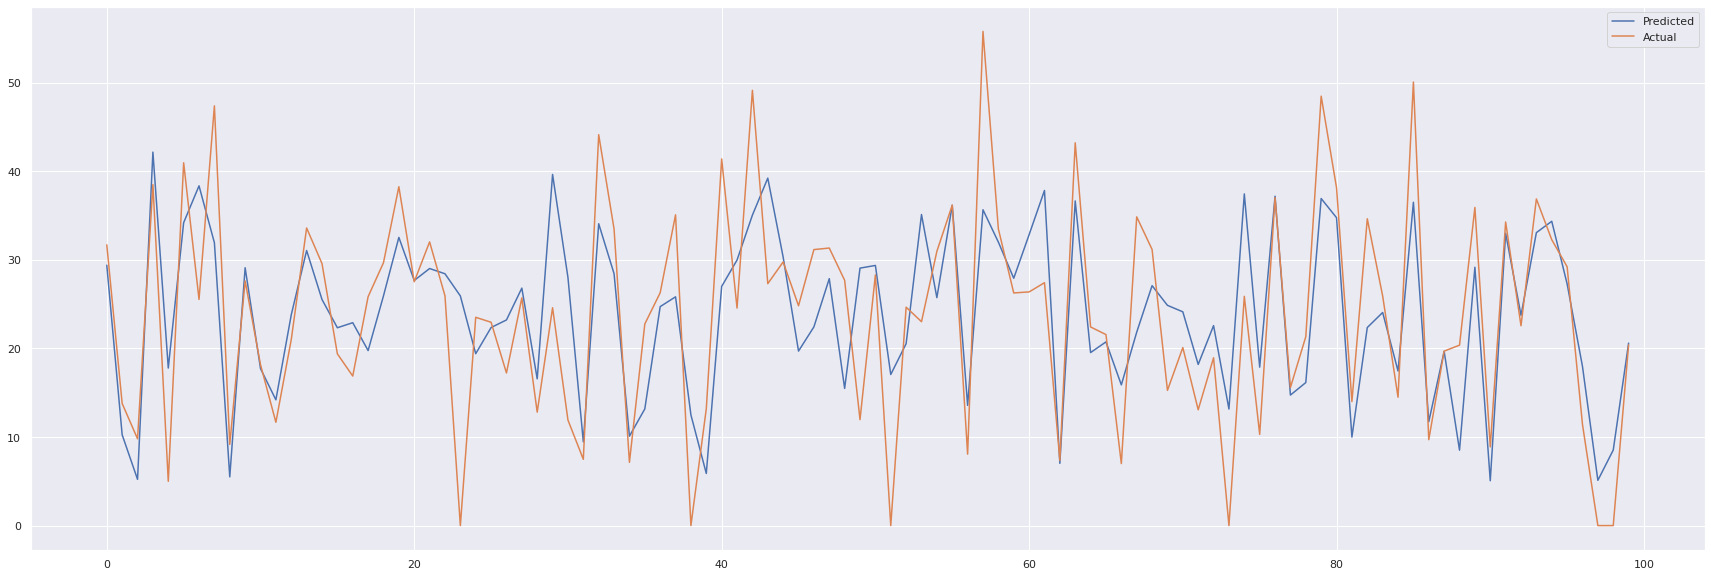

In [90]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_en[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

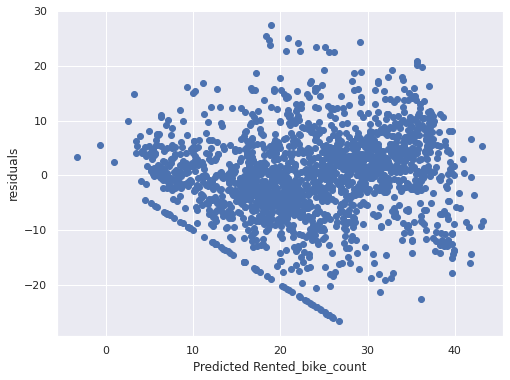

In [91]:
#Heteroscedasticity
plt.scatter((y_pred_en),(y_test - y_pred_en))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

#Running Grid Search Cross Validation for Elastic Regression

In [92]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=10)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found to be :",elastic_regressor.best_params_)
print("\nUsing",elastic_regressor.best_params_,"the negative mean squared error is :",elastic_regressor.best_score_)

The best fit alpha value is found to be : {'alpha': 0.0001, 'l1_ratio': 0.8}

Using {'alpha': 0.0001, 'l1_ratio': 0.8} the negative mean squared error is : -54.5087661657106


In [ ]:
y_pred_train_elastic =elastic_regressor.predict(X_train)
y_pred_elastic =elastic_regressor.predict(X_test)

In [ ]:
#Evaluation metrics for ElasticNet regression on train data
MSE = mean_squared_error((y_train),(y_pred_train_elastic))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_elastic)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.020915125083
RMSE : 7.349892184589036
R2: 0.6518218924789909
Adjusted R2 : 0.6486110280868664


In [ ]:
#Evaluation metrics for ridge regression on test data
MSE = mean_squared_error((y_test),(y_pred_elastic))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_test,y_pred_elastic)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 50.71147206222219
RMSE : 7.121198779855972
R2: 0.6710918809980688
Adjusted R2 : 0.6680587225519415


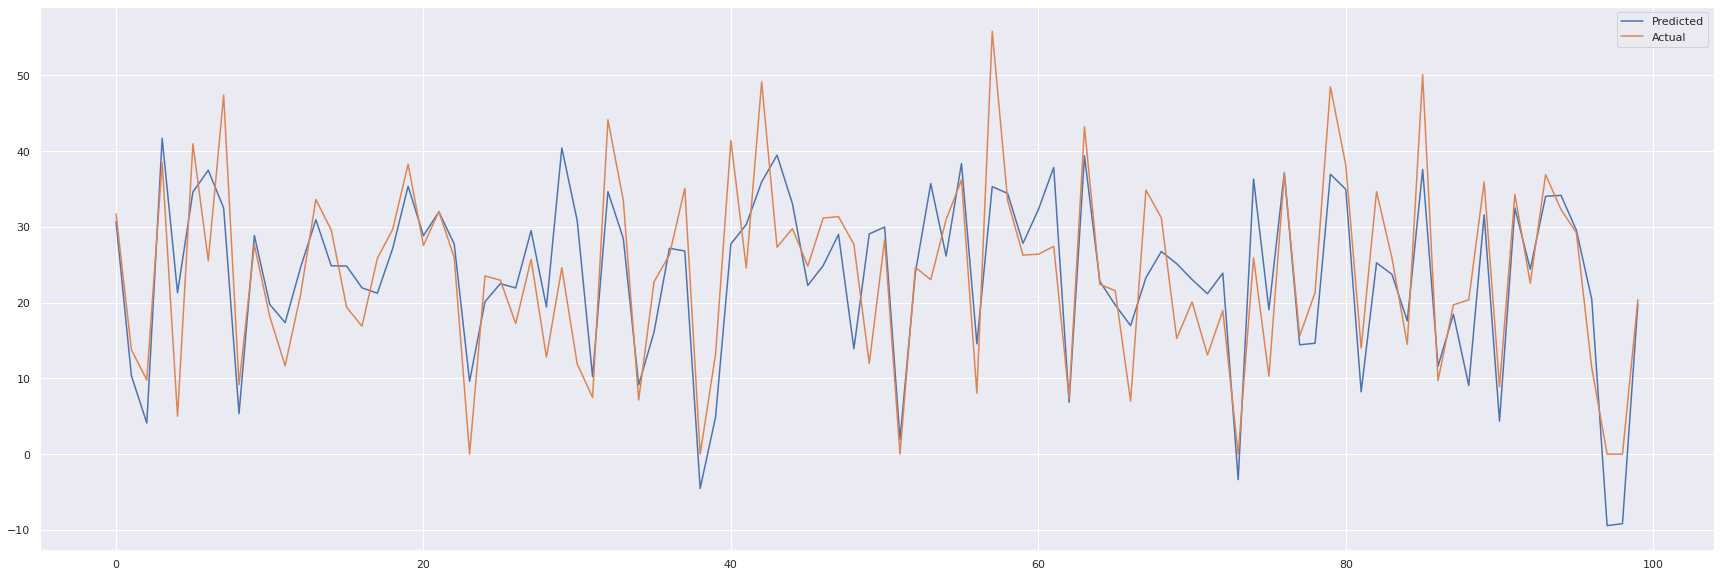

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_elastic[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

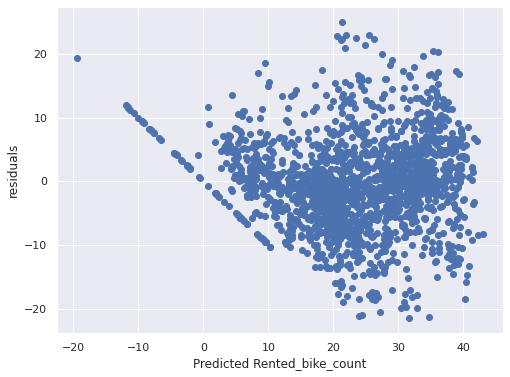

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_elastic),(y_test - y_pred_elastic))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

As we can see after applying Hyper parmameter Tuning even though R2 is 67% achieved.
We need to implement other algorithms So as to achieve maximum Score.

# Implementing of decision tree by using decision tree regressor

In [ ]:
#importing the decision tree model for training 
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#y pred for train/test data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [ ]:
#Evaluation metrics for Decision Tree on train data
MSE = mean_squared_error((y_train),(y_pred_train_dt))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_dt)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 25.75500121535289
RMSE : 5.074938543012407
R2: 0.8340026717133648
Adjusted R2 : 0.8324718606167734


In [ ]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 28.74204997012355
RMSE : 5.361161252016539
R2 : 0.8135827415868828
Adjusted R2 : 0.8118636198954651


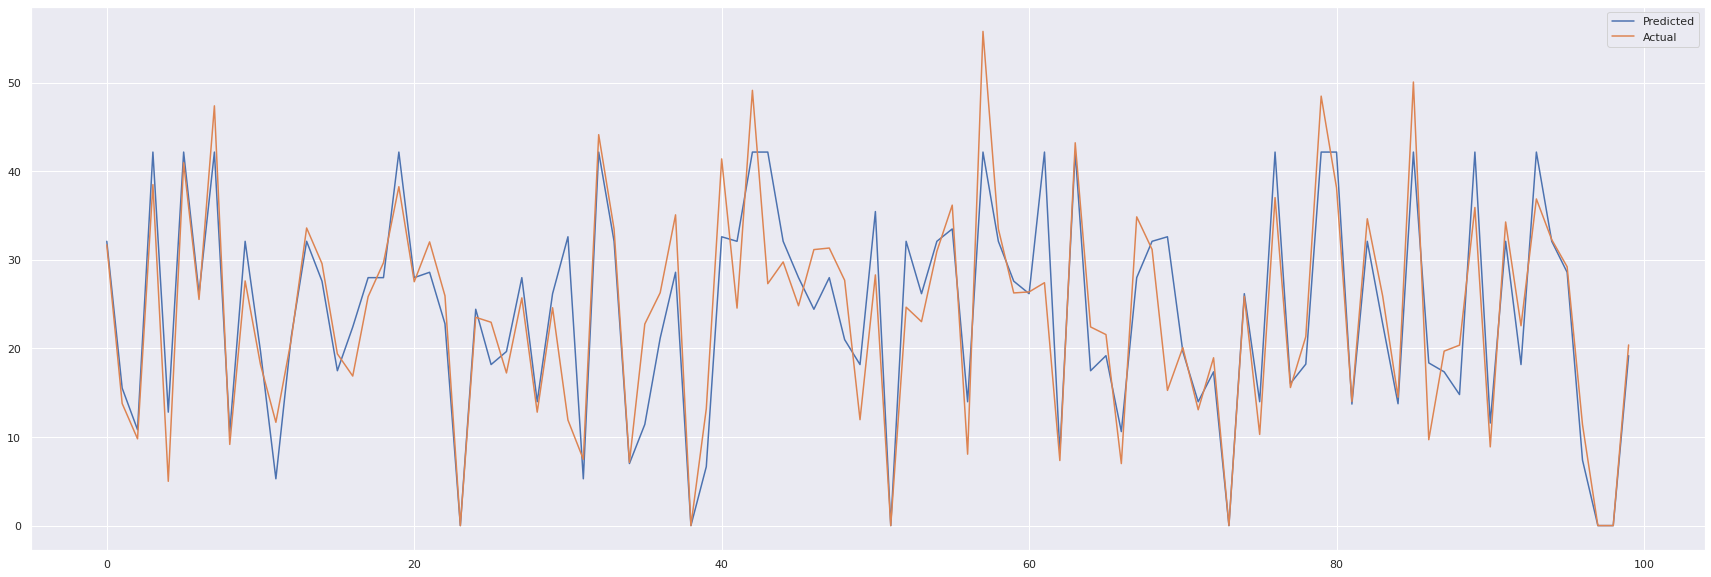

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_dt[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

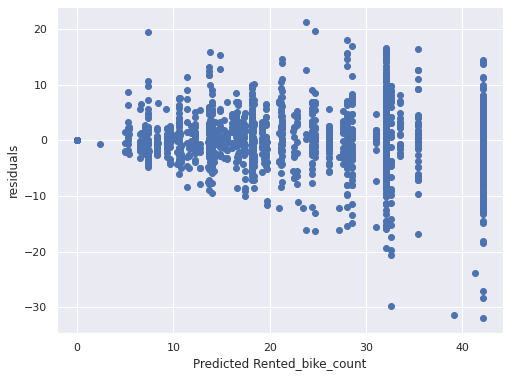

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_dt),(y_test - y_pred_test_dt))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

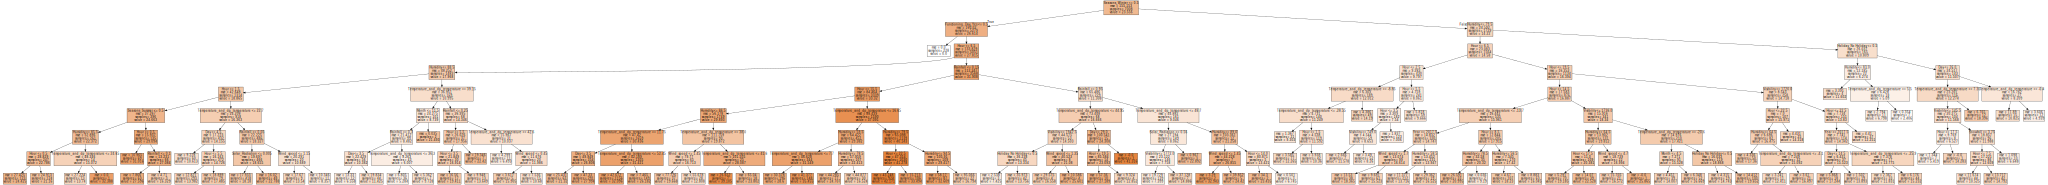

In [ ]:
# decision tree visualization
graph = Source(tree.export_graphviz(decision_regressor, out_file=None, feature_names=X_train.columns, class_names=['0', '1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

# Implementing Random forest Regressor

In [93]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb


In [ ]:
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
#Evaluation metrics for Random Forest on train data
MSE = mean_squared_error((y_train),(y_pred_train_rf))
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print('RMSE :',RMSE)

r2 = r2_score(y_train,y_pred_train_rf)
print('R2:',r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1.9876169774753505
RMSE : 1.409828705011836
R2: 0.987189318876002
Adjusted R2 : 0.9870711800299018


In [ ]:
#metric score for the rf for test dataset
print("Model Score:",rf_model.score(X_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9121581021097825
MSE : 13.543575525802646
RMSE : 3.6801597147138394
R2 : 0.9121581021097825
Adjusted R2 : 0.9113480327344261


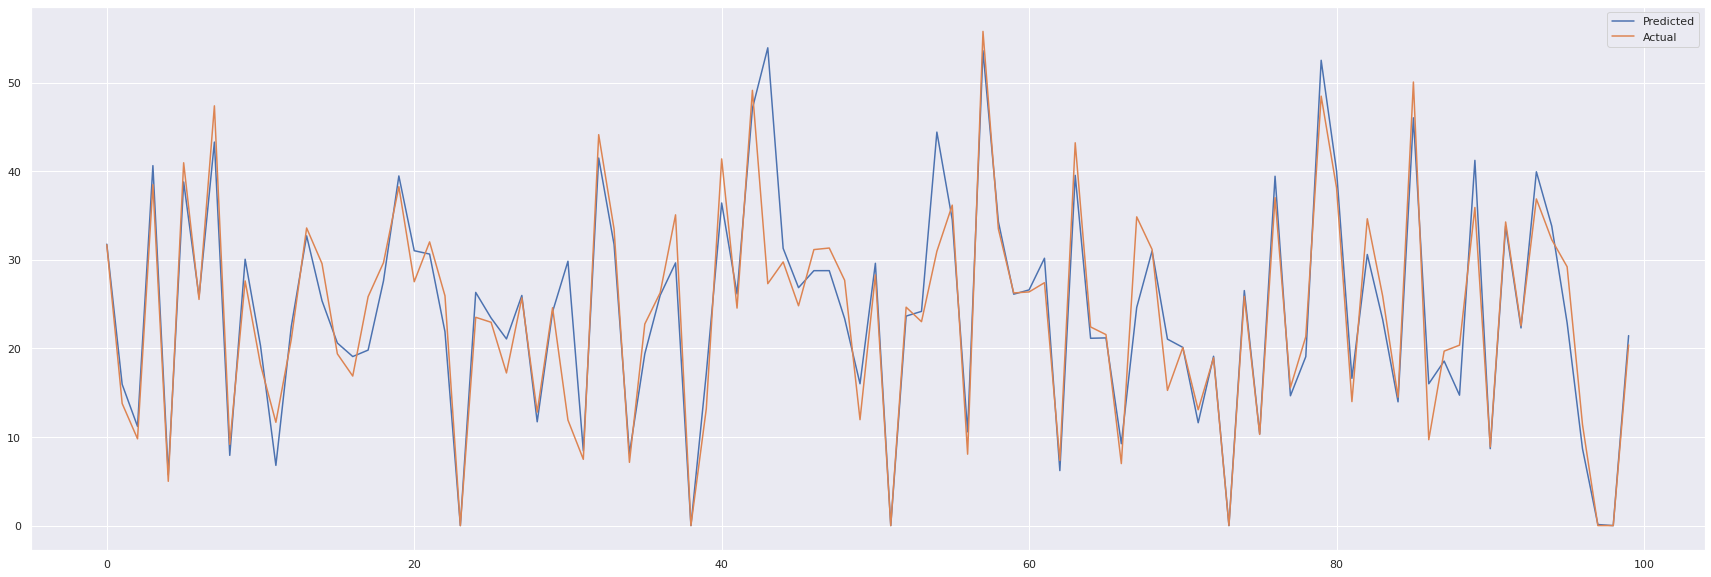

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_rf[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

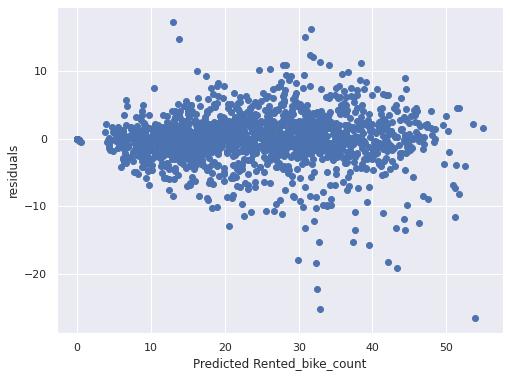

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_rf),(y_test - y_pred_test_rf))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

In [ ]:
# random forest important feature selection
rf_model.feature_importances_

array([0.28988941, 0.1383149 , 0.01275655, 0.01492613, 0.02431816,
       0.03029033, 0.00157783, 0.01991257, 0.01214447, 0.00099146,
       0.09321717, 0.00669081, 0.00394779, 0.18516284, 0.00297794,
       0.16288165])

In [ ]:
importance_rf=rf_model.feature_importances_

In [ ]:
importance_rf_dict={'Feature':list(X_train.columns),'Feature importance':importance_rf}
importance_rf_df=pd.DataFrame(importance_rf_dict)

In [ ]:
importance_rf_df['Feature importance']=round(importance_rf_df['Feature importance'],3)

In [ ]:
importance_rf_df.sort_values(by =['Feature importance'],ascending = False)

Feature  Feature importance
0                             Hour               0.290
13                  Seasons_Winter               0.185
15             Functioning_Day_Yes               0.163
1                         Humidity               0.138
10  Temperature_and_dp_temperature               0.093
5                         Rainfall               0.030
4                  Solar_Radiation               0.024
7                              Day               0.020
3                       Visibility               0.015
2                       Wind_speed               0.013
8                            Month               0.012
11                  Seasons_Spring               0.007
12                  Seasons_Summer               0.004
14              Holiday_No Holiday               0.003
6                         Snowfall               0.002
9                             Year               0.001

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features=X_train.columns
importance_rf=rf_model.feature_importances_
indices=np.argsort(importance_rf)

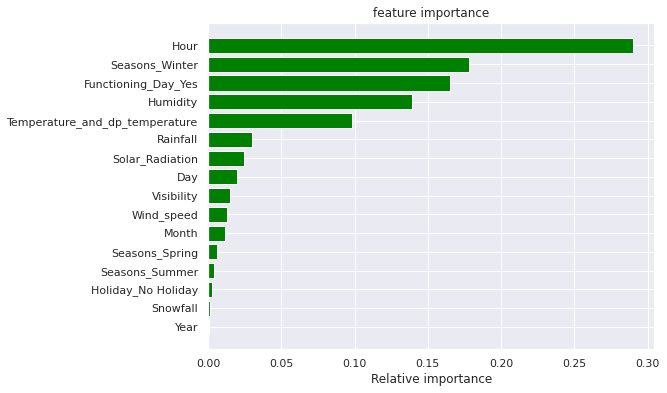

In [ ]:
plt.title("feature importance")
plt.barh(range(len(indices)),importance_rf[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()     

#Running Grid Search Cross Validation for Random Forest Regressor

In [94]:
# number of trees
n_estimators=[50,80,100]

#max deapth of tree
max_depth=[4,7,8]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [95]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 7, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [96]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=80)

In [97]:
rf_optimal_model = rf_grid.best_estimator_

In [98]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [99]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)



In [100]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8405532533771385
MSE : 24.738658118430028
RMSE : 4.973797152923511
R2 : 0.8405532533771385
Adjusted R2 : 0.8390828511028067


In [101]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8405532533771385
MSE : 25.730569594970007
RMSE : 5.072530886546676
R2 : 0.8331148179657277
Adjusted R2 : 0.8315758191688699


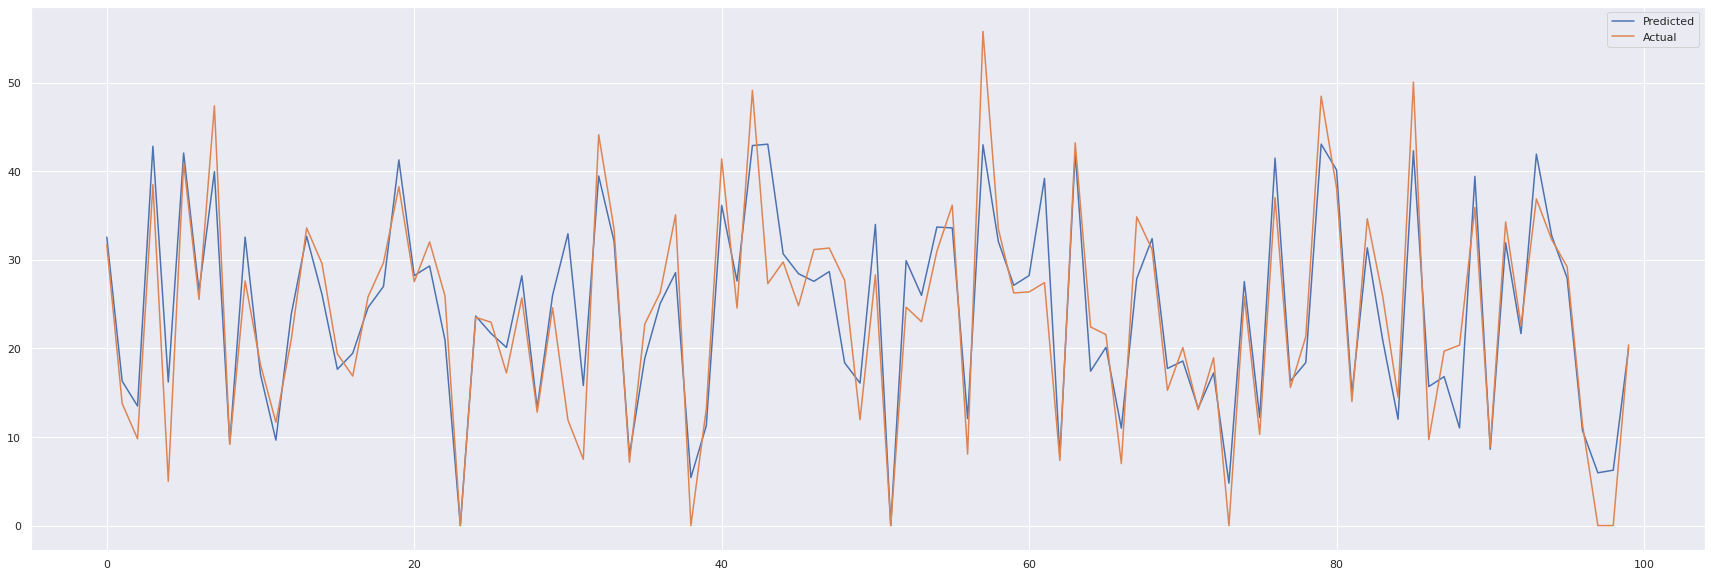

In [102]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_r_g[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'residuals')

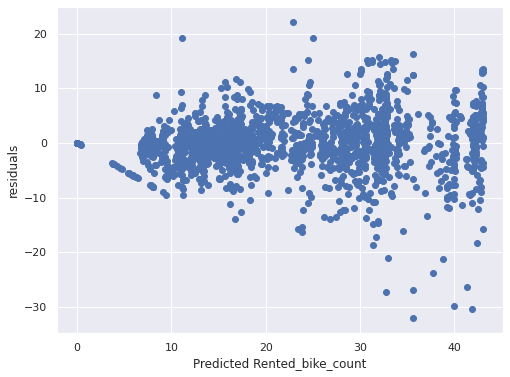

In [107]:
#Heteroscedasticity
plt.scatter((y_pred_test_r_g),(y_test - y_pred_test_r_g))
plt.xlabel('Predicted Rented_bike_count')
plt.ylabel('residuals')

In [103]:
# for the Feature Importance
rf_optimal_model.feature_importances_

array([3.22161673e-01, 1.49669744e-01, 1.63416455e-04, 1.29431771e-03,
       5.55654372e-03, 1.70610829e-02, 4.33179862e-04, 4.24688875e-03,
       1.17681034e-03, 7.29769910e-04, 7.38721480e-02, 2.76172564e-03,
       4.34086641e-03, 2.26638610e-01, 6.47483276e-04, 1.89245741e-01])

In [104]:
#important feature selection
importance_rf_gd=rf_optimal_model.feature_importances_
imortance_rf_gddict={"Feature":list(X_train.columns),"Feature importance":importance_rf_gd}
imortance_rf_gddf=pd.DataFrame(imortance_rf_gddict)

In [105]:
imortance_rf_gddf['Feature importance'] = round(imortance_rf_gddf['Feature importance'],2)

In [106]:
#reading table of important features
imortance_rf_gddf.head()

Feature  Feature importance
0             Hour                0.32
1         Humidity                0.15
2       Wind_speed                0.00
3       Visibility                0.00
4  Solar_Radiation                0.01

In [ ]:
#featuer in ascending order
imortance_rf_gddf.sort_values(by=["Feature importance"],ascending=False)

Feature  Feature importance
0                             Hour                0.32
13                  Seasons_Winter                0.23
15             Functioning_Day_Yes                0.19
1                         Humidity                0.15
10  Temperature_and_dp_temperature                0.07
5                         Rainfall                0.02
4                  Solar_Radiation                0.01
12                  Seasons_Summer                0.01
2                       Wind_speed                0.00
3                       Visibility                0.00
6                         Snowfall                0.00
7                              Day                0.00
8                            Month                0.00
9                             Year                0.00
11                  Seasons_Spring                0.00
14              Holiday_No Holiday                0.00

In [ ]:
rf_optimal_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
features=X_train.columns
importance_rfgd=rf_optimal_model.feature_importances_
indices=np.argsort(importance_rfgd)

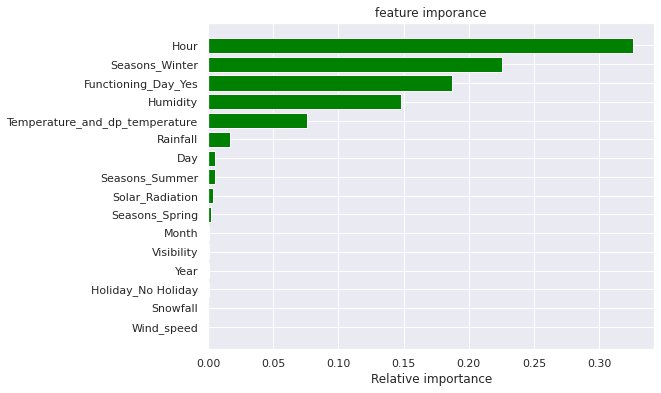

In [ ]:
#bar plot for important features 
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rfgd[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()  

# Implementing Gradient Boosting Regression

In [ ]:
# gradient boosting model import
gbd_model=GradientBoostingRegressor()
gbd_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_gb = gbd_model.predict(X_train)
y_pred_test_gb = gbd_model.predict(X_test)

In [ ]:
# for train data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8867752706370704
MSE : 17.56716853487477
RMSE : 4.191320619431872
R2 : 0.8867752706370704
Adjusted R2 : 0.8857311232769511


In [ ]:
# for test data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_gb))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8867752706370704
MSE : 18.978569102414113
RMSE : 4.356439957398026
R2 : 0.876907429207259
Adjusted R2 : 0.8757722815803518


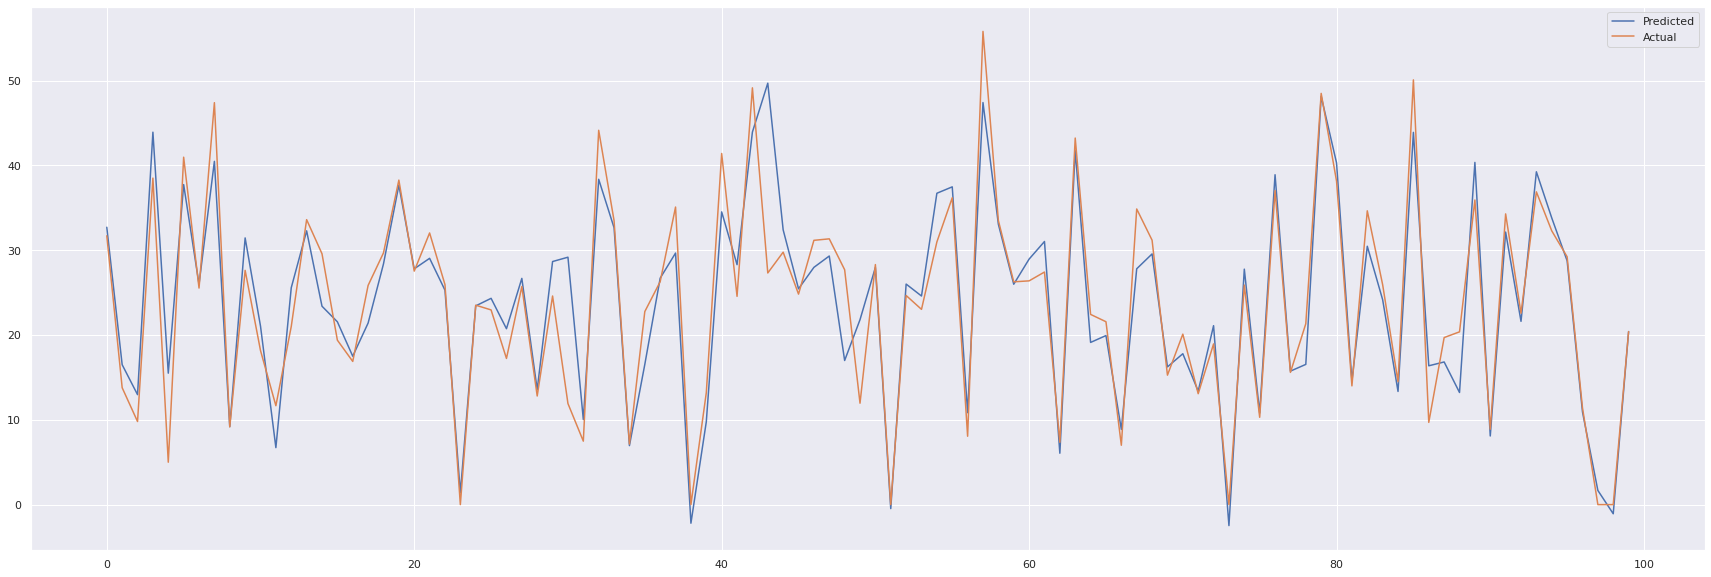

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_gb[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

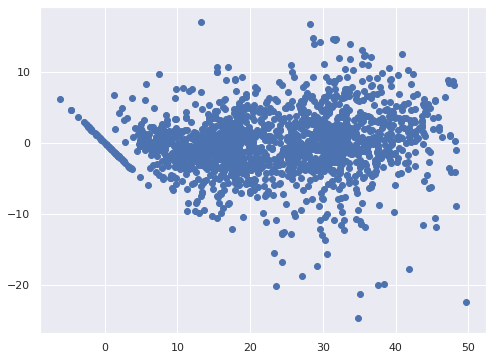

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_gb),(y_test)-(y_pred_test_gb))

In [ ]:
#feature importance
gbd_model.feature_importances_

array([2.82801219e-01, 1.11878561e-01, 3.16360438e-04, 2.00071912e-03,
       3.16583894e-02, 5.69450096e-02, 6.49141808e-04, 9.59709280e-03,
       6.39575598e-03, 2.11472825e-04, 1.85821161e-01, 2.71904487e-03,
       4.24245943e-03, 1.16552438e-01, 1.88639971e-03, 1.86324775e-01])

In [ ]:
#creating a data frame for important features
importances_gb = gbd_model.feature_importances_

importance_dictgb = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances_gb}

importance_dfgb = pd.DataFrame(importance_dictgb)

In [ ]:
importance_dfgb['Feature Importance'] = round(importance_dfgb['Feature Importance'],2)

In [ ]:
#reading the important features
importance_dfgb.head()

Feature  Feature Importance
0             Hour                0.28
1         Humidity                0.11
2       Wind_speed                0.00
3       Visibility                0.00
4  Solar_Radiation                0.03

In [ ]:
importance_dfgb.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0                             Hour                0.28
10  Temperature_and_dp_temperature                0.19
15             Functioning_Day_Yes                0.19
13                  Seasons_Winter                0.12
1                         Humidity                0.11
5                         Rainfall                0.06
4                  Solar_Radiation                0.03
7                              Day                0.01
8                            Month                0.01
2                       Wind_speed                0.00
3                       Visibility                0.00
6                         Snowfall                0.00
9                             Year                0.00
11                  Seasons_Spring                0.00
12                  Seasons_Summer                0.00
14              Holiday_No Holiday                0.00

In [ ]:
gbd_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances =gbd_model.feature_importances_
indices = np.argsort(importances)

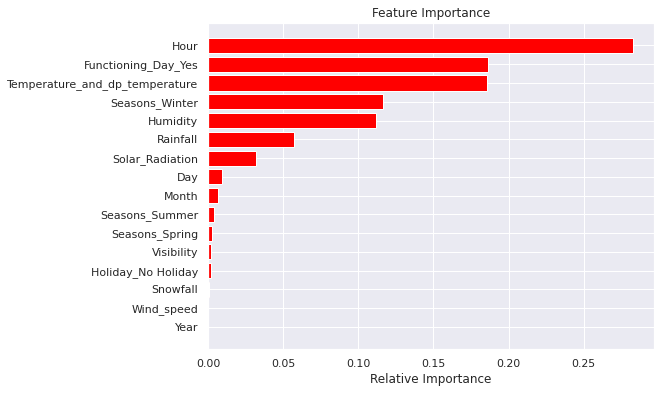

In [ ]:
#plot the feature importance
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Running  GridsearchCV For Gradient Boost

In [ ]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   2.4s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 7, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

y_pred_train_gb_g = gb_optimal_model.predict(X_train)
y_pred_test_gb_g= gb_optimal_model.predict(X_test)

In [ ]:
#metrics for rf score with gd for train
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gb_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gb_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9481049095333445
MSE : 8.051684517064428
RMSE : 2.837549033420291
R2 : 0.9481049095333445
Adjusted R2 : 0.9476263380938825


In [ ]:
#metrics for rf score with gd for test

MSE= mean_squared_error(y_test, y_pred_test_gb_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


r2= r2_score(y_test, y_pred_test_gb_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_gb_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 13.48411102400463
RMSE : 3.6720717618266434
R2 : 0.9125437812596556
Adjusted R2 : 0.9117372685796294


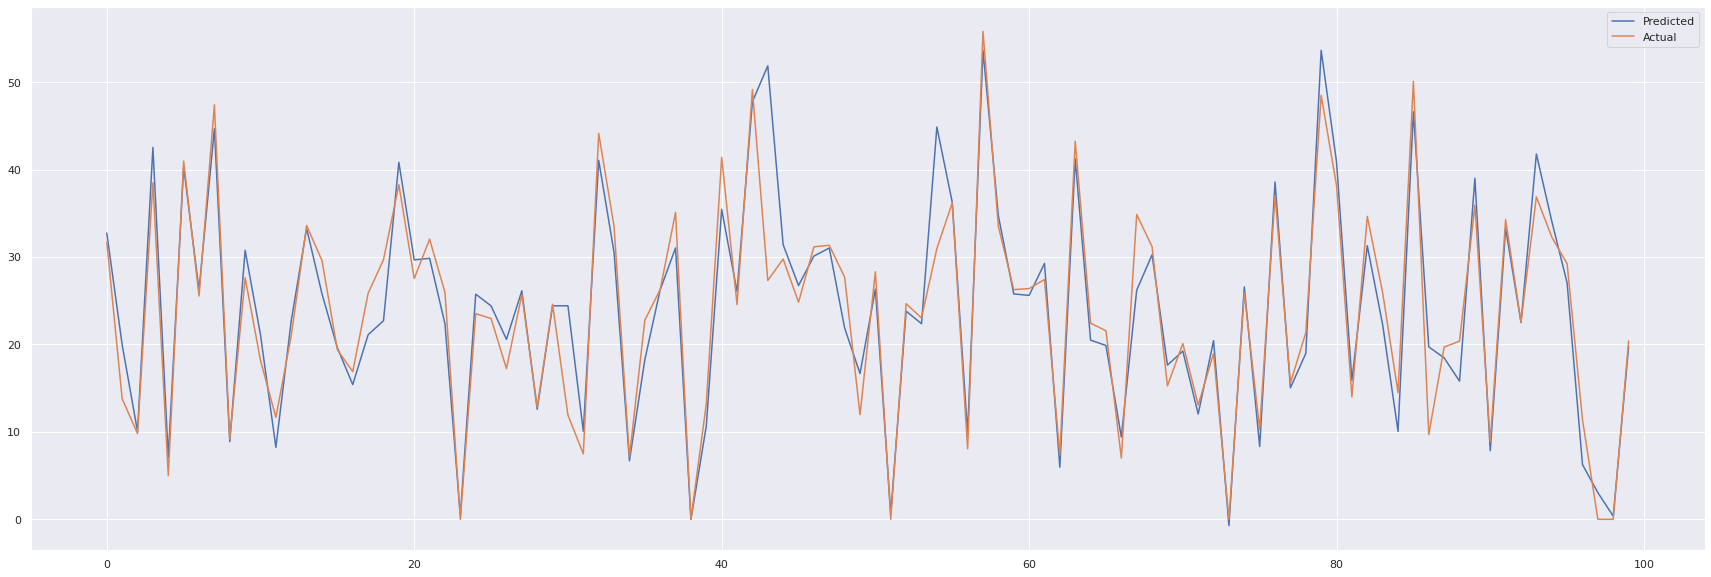

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_gb_g[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

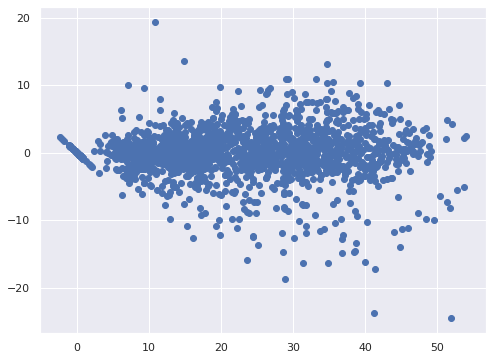

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_gb_g),(y_test)-(y_pred_test_gb_g))

# Implementing Xg Boost

In [ ]:
# Create an instance of the Xgboost Regressor
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[08:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_xg = xg_model.predict(X_train)
y_pred_test_xg = xg_model.predict(X_test)

In [ ]:
#xg boost on train data
MSE= mean_squared_error(y_train, y_pred_train_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_xg)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 18.11271206660421
RMSE : 4.2559032022126875
R2 : 0.8832591081654041
Adjusted R2 : 0.8821825350994943


In [ ]:
#Xg boost for test
MSE= mean_squared_error(y_test, y_pred_test_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_xg))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 19.37511776720657
RMSE : 4.401717592850156
R2 : 0.8743354653078561
Adjusted R2 : 0.8731765992818767


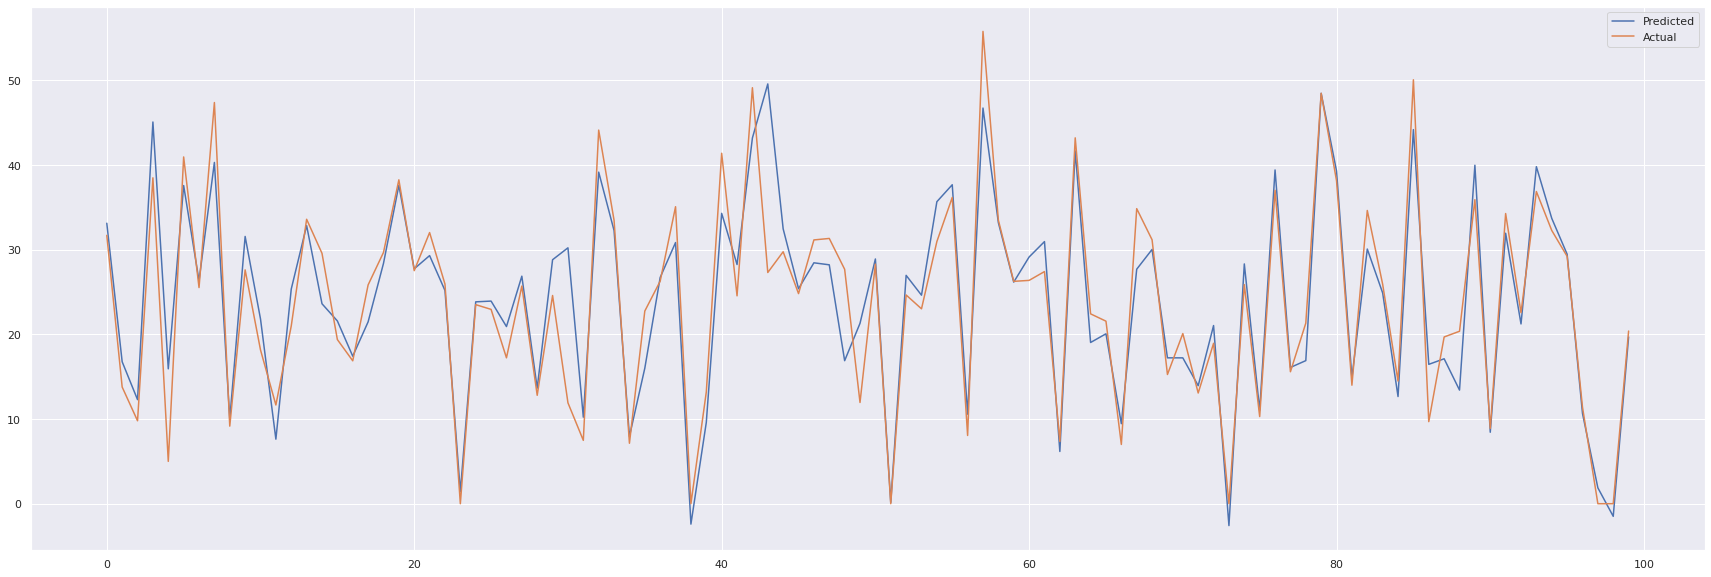

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_xg[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

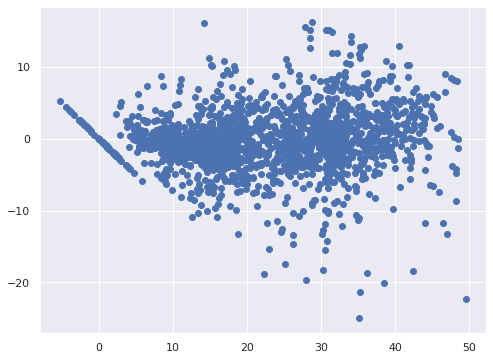

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_xg),(y_test)-(y_pred_test_xg))

In [ ]:
xg_model.feature_importances_

array([0.07043608, 0.07212261, 0.00119628, 0.00500397, 0.0465274 ,
       0.06968937, 0.00420125, 0.01216622, 0.01245302, 0.00561167,
       0.08369131, 0.00852334, 0.02486382, 0.3571751 , 0.01020109,
       0.21613745], dtype=float32)

In [ ]:
importances = xg_model.feature_importances_

importance_dictxg = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_dfxg = pd.DataFrame(importance_dictxg)

In [ ]:
importance_dfxg['Feature Importance'] = round(importance_dfxg['Feature Importance'],2)

In [ ]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

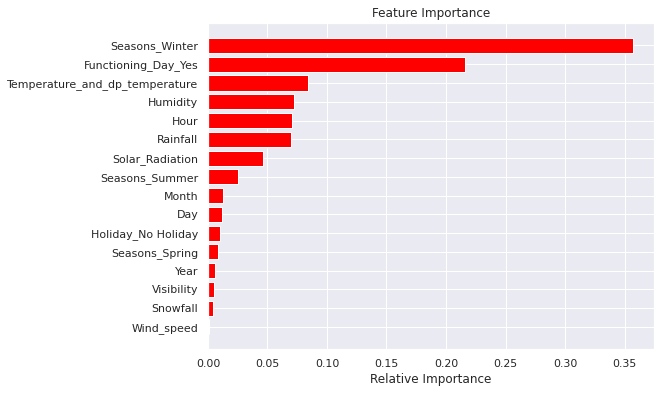

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Implementing GridSearchCV for Xg Boost

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,'learning_rate': [0.1, 0.05, 0.01, 0.005]}

In [ ]:

xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[08:25:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[08:25:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[08:25:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[08:25:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[08:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[08:25:40] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 7, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
xg_grid.best_estimator_

XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
xg_optimal_model = xg_grid.best_estimator_

In [ ]:
xg_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_xg_g = xg_optimal_model.predict(X_train)
y_pred_test_xg_g  = xg_optimal_model.predict(X_test)

In [ ]:
#Metrics  score of Xg boost for train data
MSE= mean_squared_error(y_train, y_pred_train_xg_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_xg_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 3.5385453516989545
RMSE : 1.8811021640780052
R2 : 0.9771932033902228
Adjusted R2 : 0.9769828813465591


In [ ]:
#Metrics of Xg boost for test
MSE= mean_squared_error(y_test, y_pred_test_xg_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_xg_g))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_xg_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.879671113370156
RMSE : 3.5888258683544616
R2 : 0.9164641011788358
Adjusted R2 : 0.9156937413049807


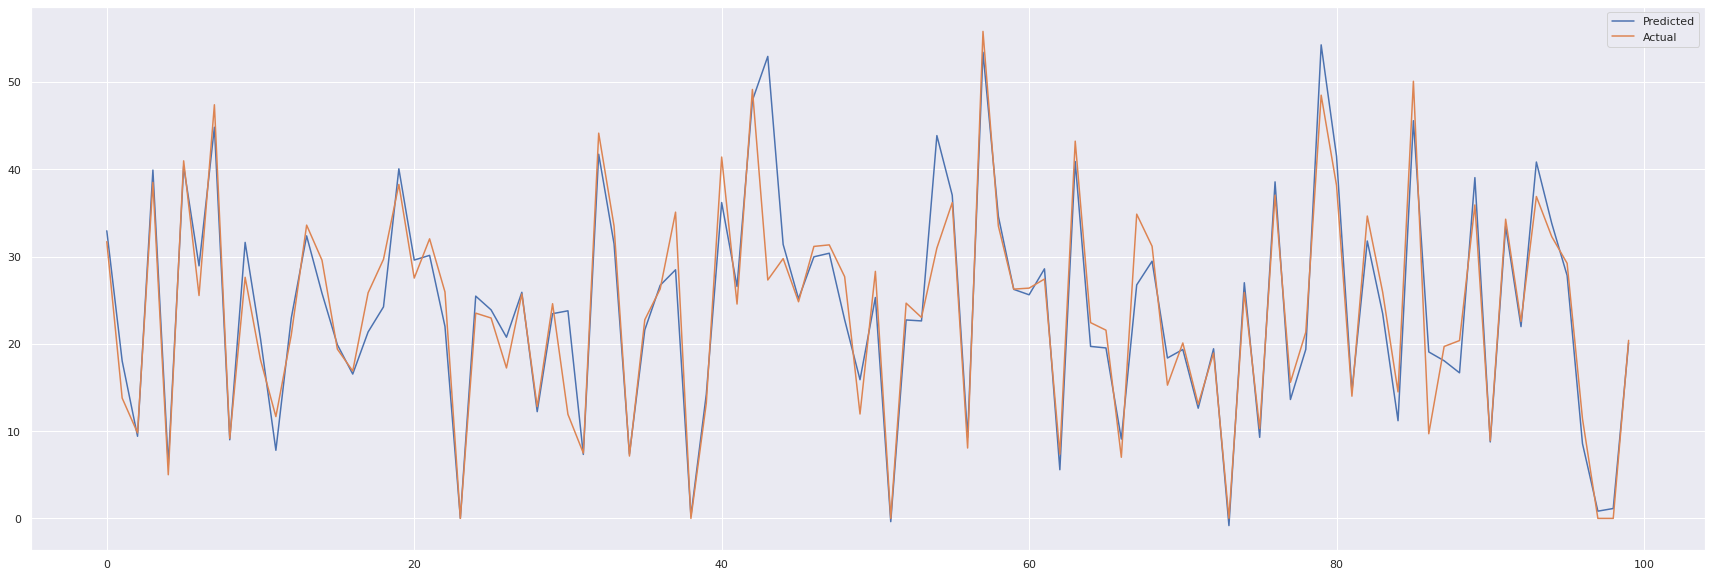

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(np.array(y_pred_test_xg_g[0:100]))
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

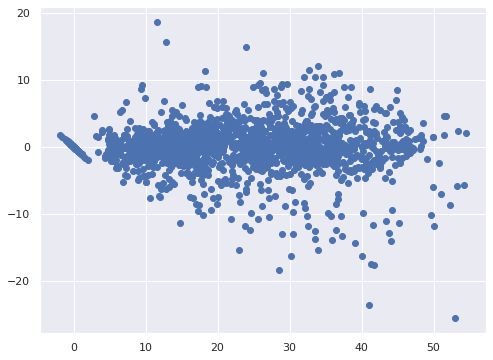

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_xg_g),(y_test)-(y_pred_test_xg_g))

In [ ]:
#Feature importance
xg_optimal_model.feature_importances_

array([0.03486099, 0.01918352, 0.00133708, 0.00195803, 0.00864317,
       0.03215949, 0.00346533, 0.0036974 , 0.0034023 , 0.00368699,
       0.01507977, 0.01198918, 0.01102114, 0.5354856 , 0.00497213,
       0.3090579 ], dtype=float32)

In [ ]:
importances = xg_optimal_model.feature_importances_

importance_dictxgt = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_dfxgt = pd.DataFrame(importance_dictxgt)

In [ ]:
importance_dfxgt['Feature Importance'] = round(importance_dfxgt['Feature Importance'],2)

In [ ]:
importance_dfxgt.head()

Feature  Feature Importance
0             Hour                0.03
1         Humidity                0.02
2       Wind_speed                0.00
3       Visibility                0.00
4  Solar_Radiation                0.01

In [ ]:
importance_dfxgt.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
13                  Seasons_Winter                0.54
15             Functioning_Day_Yes                0.31
0                             Hour                0.03
5                         Rainfall                0.03
1                         Humidity                0.02
10  Temperature_and_dp_temperature                0.02
4                  Solar_Radiation                0.01
11                  Seasons_Spring                0.01
12                  Seasons_Summer                0.01
2                       Wind_speed                0.00
3                       Visibility                0.00
6                         Snowfall                0.00
7                              Day                0.00
8                            Month                0.00
9                             Year                0.00
14              Holiday_No Holiday                0.00

In [ ]:
features = X_train.columns
importances = xg_optimal_model.feature_importances_
indices = np.argsort(importances)

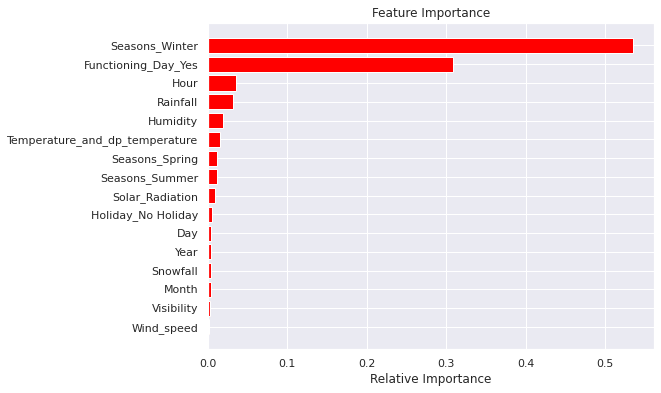

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Model Summary
--- 

##For Train Dataset

In [113]:
from prettytable import PrettyTable
train_data = PrettyTable(['SL NO','MODEL_NAME', 'Train MSE', 'Train RMSE','Train R^2','Train Adjusted R^2'])
train_data.add_row(['1','Linear Regression','54.020892750884485','7.349890662512231','0.6518220366862129','0.6510251768073656'])
train_data.add_row(['2','Lasso Regression','54.02113494245981','7.349907138356226','0.6518204757018393','0.6486095982443347'])
train_data.add_row(['3','Ridge Regression','54.02089282208099','7.349890667355603','0.6518220362273338','0.6486111731608424'])
train_data.add_row(['4','ElasticNet Regression','54.020915125083','7.349892184589036','0.6518218924789909','0.6486110280868664'])
train_data.add_row(['5','DecisionTree Regressor','25.75500121535289','5.074938543012407','0.8340026717133648','0.8324718606167734'])
train_data.add_row(['6','RandomForest Regressor','24.828408076362674','4.9828112623661225','0.8399747927858893','0.838499056004664'])
train_data.add_row(['7','Gradient Boost','8.051684517064428','2.837549033420291','0.9481049095333445','0.9476263380938825'])
train_data.add_row(['8','Xg Boost','18.11271206660421','4.2559032022126875','0.9771932033902228','0.9769828813465591'])
print(train_data)

+-------+------------------------+--------------------+--------------------+--------------------+--------------------+
| SL NO |       MODEL_NAME       |     Train MSE      |     Train RMSE     |     Train R^2      | Train Adjusted R^2 |
+-------+------------------------+--------------------+--------------------+--------------------+--------------------+
|   1   |   Linear Regression    | 54.020892750884485 | 7.349890662512231  | 0.6518220366862129 | 0.6510251768073656 |
|   2   |    Lasso Regression    | 54.02113494245981  | 7.349907138356226  | 0.6518204757018393 | 0.6486095982443347 |
|   3   |    Ridge Regression    | 54.02089282208099  | 7.349890667355603  | 0.6518220362273338 | 0.6486111731608424 |
|   4   | ElasticNet Regression  |  54.020915125083   | 7.349892184589036  | 0.6518218924789909 | 0.6486110280868664 |
|   5   | DecisionTree Regressor | 25.75500121535289  | 5.074938543012407  | 0.8340026717133648 | 0.8324718606167734 |
|   6   | RandomForest Regressor | 24.8284080763

##For Test DataSet

In [112]:
test_data = PrettyTable(['SL NO','MODEL_NAME', 'Test MSE', 'Test RMSE','Test R^2','Test Adjusted R^2'])
test_data.add_row(['1','Linear Regression','50.71126097463167','7.121183958769192','0.6710932500851713','0.668060104264631'])
test_data.add_row(['2','Lasso Regression','50.71557738931464','7.121487020932822','0.6710652543718449','0.6680318503775795'])
test_data.add_row(['3','Ridge Regression','50.711251168967785','7.1211832702836535','0.6710933136834525','0.6680601684494094'])
test_data.add_row(['4','ElasticNet Regression','50.71147206222219','7.121198779855972','0.6710918809980688','0.6680587225519415'])
test_data.add_row(['5','DecisionTree Regressor','28.74204997012355','5.361161252016539','0.8135827415868828','0.811863619895465'])
test_data.add_row(['6','RandomForest Regressor','13.543575525802646','3.6801597147138394','0.9121581021097825','0.9113480327344261'])
test_data.add_row(['7','Gradient Boost','13.48411102400463','3.6720717618266434','0.9125437812596556','0.9117372685796294'])
test_data.add_row(['8','Xg Boost','19.37511776720657','4.401717592850156','0.9164641011788358','0.9156937413049807'])
print(test_data)

+-------+------------------------+--------------------+--------------------+--------------------+--------------------+
| SL NO |       MODEL_NAME       |      Test MSE      |     Test RMSE      |      Test R^2      | Test Adjusted R^2  |
+-------+------------------------+--------------------+--------------------+--------------------+--------------------+
|   1   |   Linear Regression    | 50.71126097463167  | 7.121183958769192  | 0.6710932500851713 | 0.668060104264631  |
|   2   |    Lasso Regression    | 50.71557738931464  | 7.121487020932822  | 0.6710652543718449 | 0.6680318503775795 |
|   3   |    Ridge Regression    | 50.711251168967785 | 7.1211832702836535 | 0.6710933136834525 | 0.6680601684494094 |
|   4   | ElasticNet Regression  | 50.71147206222219  | 7.121198779855972  | 0.6710918809980688 | 0.6680587225519415 |
|   5   | DecisionTree Regressor | 28.74204997012355  | 5.361161252016539  | 0.8135827415868828 | 0.811863619895465  |
|   6   | RandomForest Regressor | 13.5435755258

#Conclusion :
---
* As it was stated in the problem, rented bike count was low in 2017 untill november. After that rented bike count started increasing.

* There was sharp increase in demand from the end of 2017 that too in winter season of the year. The demand however decrease at the end of 2018.

* Bike count rent is highly correlated with 'Hour', which seems obvious. Demand for bike is mostly in morning (7 to 8) and in the evening (3 to 9).

* After doing exploratory data analysis, applying Linear Regression model didn't go quite well as it gave only 67.109325% accuracy.

* Lasso and Ridge Regression helps to reduce model complexity and prevent over-fitting which may result from simple linear regression. with Lasso, ridge and ElasticNet regressor We got r squared value of 0.67106525, 0.67109331, 0.67109188 respectively.

* With Decision Tree we are able to achieve the r2 score of 0.811.

* Random forest regressor gave r squared value of 0.911 on test data.

* Gradient Boost gives higher value of R squared metric in train data  0.947
 and on test data it is 0.912

* XG Boost gave r squared value of 0.9164


* XG Boost came with best accuracy to approximate numbers of rented bikes demand. It gives amazing results of training r-square at 0.97 and test r-square value at 0.9164 also with adjusted r-square with 0.911.